# Diagnostic Analysis using Python: NHS capacity and recommendations

As being a part of a team of data analysts that has been contracted by the National Health Services (NHS), a publicly funded healthcare system in England, our team has been provided with internal and external data and a number of high-level business questions  concerning the utilisation of services, missed appointments, and the potential value of using external data sources such as Twitter (now rebranded as X) . We have started by refining the business questions to actionable analytic questions based on our review of the available data. Having in mind that the NHS must expand its infrastructure and resources to match its increasing population capacity, for this, it needs to budget correctly. We have explored the available data and we will therefore offer suggestions and recommendations based on your observations regarding the NHS's capacity and the trends in utilisation, the adequacy of the capacity and the direction of efforts for future improvements.

## I. After reviewing the provided metadata and the data files, the following questions can be arised:
#### 1. Has there been adequate staff and capacity in the networks?

1.1. What is the ratio of staff to appointments in different regions and periods?

1.2. How has the staff availability changed over time?

1.3. Are there significant regional differences in staff capacity?


#### 2. What was the actual utilization of resources?

2.1. What is the appointment utilization rate in different regions and periods?

2.2. Which service settings and context types have the highest and lowest utilization rates?

2.3. How do appointment modes affect utilization rates?


#### 3. Missed Appointments?

3.1. What is the rate of missed appointments over time and by region?

3.2. What are the common characteristics of missed appointments (e.g., time, type of appointment, mode)?

3.3. How can external data, such as Twitter trends, help in understanding reasons for missed appointments?


#### 4. Service Utilization Trends?

4.1. What are the monthly and seasonal trends in service utilization?

4.2. How do different service settings, context types, and national categories compare in terms of appointment counts?


#### 5. External Data Insights (Twitter)?

5.1. What are the top trending hashtags related to NHS services?

5.2. How can these trends inform decisions on service improvements or public awareness campaigns?

#### Initial approach: 

1. Load and Examine Data:

1.1. Load the provided datasets (actual_duration.csv, appointments_regional.csv, tweets.csv, national_categories.xlsx).

1.2. Examine the structure, types, and initial data quality of each dataset.


2. Data Wrangling:

2.1. Clean and preprocess data (handle missing values, correct data types, etc.).

2.2. Merge datasets where necessary to create comprehensive views (e.g., combining appointment data with national categories).

#### Analysing the data:

1. Descriptive Statistics and Visualizations:

1.1. Calculate basic statistics (mean, median, mode) for key metrics like appointment counts, duration, and missed appointments.

1.2. Create visualizations (bar charts, line graphs) to identify trends and patterns.


2. Trends and Patterns Analysis:

2.1. Analyze monthly and seasonal trends in appointments and missed appointments.

2.2. Compare utilization rates across different service settings and context types.


3. Correlation Analysis:

3.1. Investigate correlations between staff numbers, appointment counts, and missed appointments.


4. External Data Analysis:

4.1. Analyze Twitter data to identify trending topics and hashtags related to NHS services.

4.2. Explore correlations between social media trends and appointment data.

## II. Basic exploration and descriptive statistics
We will import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
We will then determine and comment on the quality, usefulness, and opportunities contained in the data sets.
Finally we will document initial observations and findings.

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

In [3]:
# View the DataFrame.
print(ad.info())
print(ad.head())
ad.info
ad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4         

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [4]:
# Check for missing values.
missing_values = ad.isnull().sum()

print(missing_values)

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [5]:
# Review metadata and descriptive statistics.
print(ad.info())

print(ad.describe())

print(ad.describe(include=[object]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None
       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000
       sub_icb

In [6]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

In [7]:
# View the DataFrame.
print(ar.info())
print(ar.head())
ar.info
ar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034 

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [8]:
# Check for missing values.
missing_values2 = ar.isnull().sum()

print(missing_values2)

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [9]:
# Review metadata and descriptive statistics.
print(ar.info())

print(ar.describe())

print(ar.describe(include=[object]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.0000

In [10]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [11]:
# View the DataFrame.
print(nc.info())
print(nc.head())
nc.info
nc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [12]:
# Check for missing values.
missing_values3 = nc.isnull().sum()

print(missing_values3)

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


In [13]:
# Review metadata and descriptive statistics.
print(nc.info())

print(nc.describe())

print(nc.describe(include=[object]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None
                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:0

In [14]:
# Print column names
print("Column names in the DataFrame:")
print(ad.columns)

Column names in the DataFrame:
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


**Question 1:** How many locations are there in the data set?

In [15]:
# Determine the number of locations.
num_locations = ad['sub_icb_location_name'].nunique()
print("Number of unique locations:", num_locations)

Number of unique locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [16]:
# Determine the top five locations based on record count.
top_five_locations = ad['sub_icb_location_name'].value_counts().head(5)
print("Top five locations based on record count:")
print(top_five_locations)

Top five locations based on record count:
sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: count, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
num_service_settings = nc['service_setting'].nunique()
print("Number of unique service settings:", num_service_settings)

num_service_settings = nc['national_category'].nunique()
print("Number of unique national categories:", num_service_settings)

num_service_settings = ar['appointment_status'].nunique()
print("Number of unique appointment statuses:", num_service_settings)

Number of unique service settings: 5
Number of unique national categories: 18
Number of unique appointment statuses: 3


In [18]:
# Determine the number of context types.
num_context_types = nc['context_type'].nunique()
print("Number of unique context types:", num_context_types)

# Print the unique context types
unique_context_types = nc['context_type'].unique()
print("Unique context types:", unique_context_types)

Number of unique context types: 3
Unique context types: ['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


In [19]:
# Determine the number of national categories.
num_national_categories = nc['national_category'].nunique()
print("Number of unique national categories:", num_national_categories)

# Print the unique national categories
unique_national_categories = nc['national_category'].unique()
print("Unique national categories:", unique_national_categories)

Number of unique national categories: 18
Unique national categories: ['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [20]:
# Determine the number of appointment statuses.
num_appointment_statuses = ar['appointment_status'].nunique()
print("Number of unique appointment statuses:", num_appointment_statuses)

# Print the unique appointment statuses
unique_appointment_statuses = ar['appointment_status'].unique()
print("Unique appointment statuses:", unique_appointment_statuses)

Number of unique appointment statuses: 3
Unique appointment statuses: ['Attended' 'DNA' 'Unknown']


In [21]:
# Change in Staff Availability Over Time
# Group by period and count unique staff members
staff_availability_over_time = ar.groupby('appointment_month')['hcp_type'].count().reset_index()
staff_availability_over_time.columns = ['appointment_month', 'staff_count']
print(staff_availability_over_time)

   appointment_month  staff_count
0            2020-01        20889
1            2020-02        20689
2            2020-03        21350
3            2020-04        19124
4            2020-05        18338
5            2020-06        18844
6            2020-07        19502
7            2020-08        19247
8            2020-09        20043
9            2020-10        20122
10           2020-11        19675
11           2020-12        19394
12           2021-01        19319
13           2021-02        18949
14           2021-03        19369
15           2021-04        19452
16           2021-05        19384
17           2021-06        19814
18           2021-07        19899
19           2021-08        19786
20           2021-09        20441
21           2021-10        20562
22           2021-11        20766
23           2021-12        20393
24           2022-01        20225
25           2022-02        20133
26           2022-03        20532
27           2022-04        20073
28           2

In [106]:
# Define the dictionary for mapping ICB codes to locations
uk_icb_locations = {
    'E54000008': 'NHS Cheshire and Merseyside ICB',
    'E54000010': 'NHS Staffordshire and Stoke-on-Trent ICB',
    'E54000011': 'NHS Shropshire, Telford and Wrekin ICB',
    'E54000013': 'NHS Lincolnshire Integrated Care Board',
    'E54000015': 'NHS Leicester, Leicestershire and Rutland ICB',
    'E54000018': 'NHS Coventry and Warwickshire ICB',
    'E54000019': 'NHS Herefordshire and Worcestershire ICB',
    'E54000022': 'NHS Norfolk and Waveney ICB',
    'E54000023': 'NHS Suffolk and North East Essex ICB',
    'E54000024': 'NHS Bedfordshire, Luton and Milton Keynes ICB',
    'E54000025': 'NHS Hertfordshire and West Essex ICB',
    'E54000026': 'NHS Mid and South Essex ICB',
    'E54000027': 'NHS North West London ICB',
    'E54000028': 'NHS North Central London ICB',
    'E54000029': 'NHS North East London ICB',
    'E54000030': 'NHS South East London ICB',
    'E54000031': 'NHS South West London ICB',
    'E54000032': 'NHS Kent and Medway ICB',
    'E54000034': 'NHS Frimley ICB',
    'E54000036': 'NHS Cornwall and the Isles of Scilly ICB',
    'E54000037': 'NHS Devon ICB',
    'E54000038': 'NHS Somerset ICB',
    'E54000039': 'NHS Bristol, North Somerset and South Gloucestershire ICB',
    'E54000040': 'NHS Bath and North East Somerset, Swindon and Wiltshire ICB',
    'E54000041': 'NHS Dorset ICB',
    'E54000042': 'NHS Hampshire and Isle of Wight ICB',
    'E54000043': 'NHS Gloucestershire ICB',
    'E54000044': 'NHS Buckinghamshire, Oxfordshire and Berkshire West ICB',
    'E54000048': 'NHS Lancashire and South Cumbria ICB',
    'E54000050': 'NHS North East and North Cumbria ICB',
    'E54000051': 'NHS Humber and North Yorkshire ICB',
    'E54000052': 'NHS Surrey Heartlands ICB',
    'E54000053': 'NHS Sussex ICB',
    'E54000054': 'NHS West Yorkshire ICB',
    'E54000055': 'NHS Birmingham and Solihull ICB',
    'E54000056': 'NHS Cambridgeshire and Peterborough ICB',
    'E54000057': 'NHS Greater Manchester ICB',
    'E54000058': 'NHS Derby and Derbyshire ICB',
    'E54000059': 'NHS Northamptonshire ICB',
    'E54000060': 'NHS Nottingham and Nottinghamshire ICB',
    'E54000061': 'NHS South Yorkshire ICB',
    'E54000062': 'NHS Black Country ICB'
}

# Ratio of Staff to Appointments in Different Regions and Periods - if there is enough staff and capacity
# Group by icb_ons_code and appointment_month, then calculate the sum of staff and appointments
staff_to_appointments = ar.groupby(['icb_ons_code', 'appointment_month']).agg({
    'hcp_type': 'count',  # Counting the number of staff members
    'count_of_appointments': 'sum'  # Summing the number of appointments
}).reset_index()

# Rename columns for clarity
staff_to_appointments.columns = ['icb_ons_code', 'appointment_month', 'staff_count', 'total_appointments']

# Calculate the ratio
staff_to_appointments['staff_to_appointments_ratio'] = staff_to_appointments['total_appointments'] / staff_to_appointments['staff_count']

# Map the ICB codes to their respective locations
staff_to_appointments['icb_location'] = staff_to_appointments['icb_ons_code'].map(uk_icb_locations)

# Print the result
print(staff_to_appointments.head())

  icb_ons_code appointment_month  staff_count  total_appointments  \
0    E54000008           2020-01         1595             1193082   
1    E54000008           2020-02         1571             1047799   
2    E54000008           2020-03         1649             1040457   
3    E54000008           2020-04         1462              680372   
4    E54000008           2020-05         1425              718972   

   staff_to_appointments_ratio                     icb_location  
0                   748.013793  NHS Cheshire and Merseyside ICB  
1                   666.963081  NHS Cheshire and Merseyside ICB  
2                   630.962401  NHS Cheshire and Merseyside ICB  
3                   465.370725  NHS Cheshire and Merseyside ICB  
4                   504.541754  NHS Cheshire and Merseyside ICB  


In [105]:
# Group by icb_location and calculate the total staff count, total appointments, and the new ratio
grouped_staff_to_appointments = staff_to_appointments.groupby('icb_location').agg({
    'staff_count': 'sum',
    'total_appointments': 'sum'
}).reset_index()

# Calculate the new ratio
grouped_staff_to_appointments['staff_to_appointments_ratio'] = grouped_staff_to_appointments['total_appointments'] / grouped_staff_to_appointments['staff_count']

# Sort the DataFrame by the ratio in ascending order
grouped_staff_to_appointments = grouped_staff_to_appointments.sort_values(by='staff_to_appointments_ratio')

# Display the updated DataFrame
print(grouped_staff_to_appointments)

                                                   icb_location  staff_count  \
37                     NHS Staffordshire and Stoke-on-Trent ICB        27401   
21                         NHS Lancashire and South Cumbria ICB        36360   
15                                   NHS Greater Manchester ICB        54527   
24                                  NHS Mid and South Essex ICB        22342   
7                               NHS Cheshire and Merseyside ICB        48253   
19                           NHS Humber and North Yorkshire ICB        31069   
36                                      NHS South Yorkshire ICB        23466   
38                         NHS Suffolk and North East Essex ICB        16326   
28                         NHS North East and North Cumbria ICB        43774   
22                NHS Leicester, Leicestershire and Rutland ICB        15587   
18                         NHS Hertfordshire and West Essex ICB        16809   
32                       NHS Shropshire,

### Key Observations:
#### Variation in Ratios:
There is a significant variation in the staff_to_appointments_ratio across different regions and months. This indicates that some regions may be more strained in terms of staff relative to the number of appointments than others.
#### Capacity Management:
A higher staff_to_appointments_ratio suggests a higher number of appointments per staff member, which could indicate potential overworking of staff or higher efficiency depending on the context. Conversely, a lower ratio might suggest better capacity management or underutilization of staff.
#### Low Ratios:
NHS Staffordshire and Stoke-on-Trent ICB has the lowest staff-to-appointments ratio at 481.60.
NHS Lancashire and South Cumbria ICB follows with a ratio of 591.93.
These regions have a higher number of appointments per staff member, indicating a potentially higher workload on the available staff.
#### High Ratios:
NHS North West London ICB shows the highest ratio at 4025.31, followed by NHS North East London ICB at 3064.19.
These areas have a significantly lower number of appointments per staff member, which could imply underutilization of the available staff resources or higher staff availability relative to the demand.

### Recommendation
#### Focus on Regions with Low Ratios:
Increase Staffing or Optimize Workload: Regions like NHS Staffordshire and Stoke-on-Trent ICB and NHS Lancashire and South Cumbria ICB should consider increasing staffing levels or optimizing appointment scheduling to alleviate the workload on current staff.
Evaluate Workflow Efficiency: Conduct a detailed workflow analysis to identify inefficiencies and areas for process improvement to better manage the high volume of appointments.
#### Utilize Resources in Regions with High Ratios:
Improve Awareness and Access: For regions like NHS North West London ICB and NHS North East London ICB, efforts should be made to improve patient awareness and access to services. This can include marketing campaigns or community outreach programs.
Reallocate Resources: Consider redistributing some resources or staff from regions with high ratios to those with lower ratios if feasible, ensuring a more balanced workload across the board.
#### General Recommendations:
Regular Monitoring and Adjustment: Establish a continuous monitoring system to regularly assess staff-to-appointment ratios and make data-driven adjustments as needed.

In [23]:
# Regional Differences in Staff Capacity
# Group by region and count unique staff members
regional_staff_capacity = ar.groupby('icb_ons_code')['hcp_type'].count().reset_index()
regional_staff_capacity.columns = ['icb_ons_code', 'staff_count']
print(regional_staff_capacity)

   icb_ons_code  staff_count
0     E54000008        48253
1     E54000010        27401
2     E54000011         5996
3     E54000013         6061
4     E54000015        15587
5     E54000018         6303
6     E54000019         6013
7     E54000022         6582
8     E54000023        16326
9     E54000024         5467
10    E54000025        16809
11    E54000026        22342
12    E54000027         7299
13    E54000028         6579
14    E54000029         7700
15    E54000030         7462
16    E54000031         7324
17    E54000032         7615
18    E54000034         5768
19    E54000036         6714
20    E54000037         7453
21    E54000038         6813
22    E54000039         6993
23    E54000040         5272
24    E54000041         5345
25    E54000042        12057
26    E54000043         6707
27    E54000044        19806
28    E54000048        36360
29    E54000050        43774
30    E54000051        31069
31    E54000052         6921
32    E54000053        18510
33    E5400005

In [104]:
# Ratio of Staff to Appointments in Different Regions and Periods - if there is enough staff and capacity
# Group by icb_ons_code and appointment_month, then calculate the sum of staff and appointments
staff_to_appointments = ar.groupby(['icb_ons_code', 'appointment_month']).agg({
    'hcp_type': 'count',  # Counting the number of staff members
    'count_of_appointments': 'sum'  # Summing the number of appointments
}).reset_index()

# Rename columns for clarity
staff_to_appointments.columns = ['icb_ons_code', 'appointment_month', 'staff_count', 'total_appointments']

# Calculate the ratio
staff_to_appointments['staff_to_appointments_ratio'] = staff_to_appointments['total_appointments'] / staff_to_appointments['staff_count']

# Map the ICB codes to their respective locations
staff_to_appointments['icb_location'] = staff_to_appointments['icb_ons_code'].map(uk_icb_locations)

# Calculate utilization rate by dividing the number of appointments by the staff count
utilization_rate = ar.groupby(['icb_ons_code', 'appointment_month']).agg({
    'hcp_type': 'count',  # Counting the number of staff members
    'count_of_appointments': 'sum'  # Summing the number of appointments
}).reset_index()

# Calculate the utilization rate
utilization_rate['utilization_rate'] = utilization_rate['count_of_appointments'] / utilization_rate['hcp_type']

# Map the ICB codes to their respective locations
utilization_rate['icb_location'] = utilization_rate['icb_ons_code'].map(uk_icb_locations)

# Group by icb_location and calculate the average utilization rate
grouped_utilization_rate = utilization_rate.groupby('icb_location').agg({
    'utilization_rate': 'mean',
    'hcp_type': 'sum',
    'count_of_appointments': 'sum'
}).reset_index()

# Sort the DataFrame by the utilization rate in ascending order
grouped_utilization_rate = grouped_utilization_rate.sort_values(by='utilization_rate')

# Display the updated DataFrame
print(grouped_utilization_rate)

                                                   icb_location  \
37                     NHS Staffordshire and Stoke-on-Trent ICB   
21                         NHS Lancashire and South Cumbria ICB   
15                                   NHS Greater Manchester ICB   
24                                  NHS Mid and South Essex ICB   
7                               NHS Cheshire and Merseyside ICB   
19                           NHS Humber and North Yorkshire ICB   
36                                      NHS South Yorkshire ICB   
38                         NHS Suffolk and North East Essex ICB   
28                         NHS North East and North Cumbria ICB   
22                NHS Leicester, Leicestershire and Rutland ICB   
18                         NHS Hertfordshire and West Essex ICB   
32                       NHS Shropshire, Telford and Wrekin ICB   
5       NHS Buckinghamshire, Oxfordshire and Berkshire West ICB   
33                                             NHS Somerset IC

### Observations
#### Wide Variation in Utilization Rates: 
The utilization rates of healthcare professionals (HCP) across different Integrated Care Boards (ICBs) show significant variation. The lowest utilization rate is observed for NHS Staffordshire and Stoke-on-Trent ICB with 480.11 appointments per staff member, while the highest is for NHS North West London ICB with 4046.49 appointments per staff member.
#### High Staff-to-Appointments Ratios: 
Some ICBs have exceptionally high staff-to-appointments ratios, indicating potential over-utilization of staff. NHS North West London ICB and NHS North East London ICB are notable examples with ratios of 4046.49 and 3055.05, respectively.
#### Efficient Utilization in Some Regions: 
ICBs like NHS Cheshire and Merseyside ICB, NHS Humber and North Yorkshire ICB, and NHS South Yorkshire ICB have relatively balanced staff-to-appointments ratios, suggesting efficient utilization of healthcare resources.
#### Inconsistent Distribution of Resources: 
The distribution of staff and appointments is inconsistent across regions. Some areas have a surplus of staff but a lower number of appointments, while others are experiencing the opposite scenario.
#### Potential for Improvement in High-Ratio ICBs: 
ICBs with high staff-to-appointments ratios might have room for improvement in resource allocation, training, and operational efficiency.

### Recommendations
#### Redistribution of Staff Resources: 
Consider redistributing healthcare professionals from regions with lower utilization rates to those with higher demand. This can help balance the workload and improve efficiency across ICBs.
#### Enhanced Digital Consultations: 
Increase the adoption of digital consultations, especially in regions with high utilization rates. This can help manage the patient load more effectively and reduce the physical strain on healthcare facilities and staff.
#### Operational Efficiency Improvements: 
Conduct operational reviews in ICBs with high staff-to-appointments ratios to identify inefficiencies and areas for improvement. Implement best practices from regions with lower ratios and higher efficiency.
#### Policy Adjustments: 
Review and adjust healthcare policies to ensure equitable distribution of resources and to address regional disparities in healthcare delivery. This might include incentives for healthcare staff to work in high-demand areas.

In [25]:
# Highest and Lowest Utilization Rates by Service Settings and Context Types
# Group by service settings and context types to find the sum of appointments
service_context_utilization = nc.groupby(['service_setting', 'context_type']).agg({
    'count_of_appointments': 'sum'
}).reset_index()

# Sort to find the highest and lowest utilization rates
highest_utilization = service_context_utilization.sort_values(by='count_of_appointments', ascending=False).head()
lowest_utilization = service_context_utilization.sort_values(by='count_of_appointments').head()
print("Highest Utilization Rates:")
print(highest_utilization)
print("\nLowest Utilization Rates:")
print(lowest_utilization)

Highest Utilization Rates:
        service_setting            context_type  count_of_appointments
2      General Practice  Care Related Encounter              245814216
3      General Practice    Inconsistent Mapping               24997475
8              Unmapped                Unmapped               11080810
6  Primary Care Network  Care Related Encounter                5744946
4                 Other  Care Related Encounter                3777544

Lowest Utilization Rates:
             service_setting            context_type  count_of_appointments
1  Extended Access Provision    Inconsistent Mapping                 438355
7       Primary Care Network    Inconsistent Mapping                 812440
5                      Other    Inconsistent Mapping                1642532
0  Extended Access Provision  Care Related Encounter                1738452
4                      Other  Care Related Encounter                3777544


In [26]:
# Effect of Appointment Modes on Utilization Rates
# Group by appointment mode to find the sum of appointments
appointment_mode_utilization = ar.groupby('appointment_mode').agg({
    'count_of_appointments': 'sum'
}).reset_index()

# Sort the utilization rates for each mode from highest to lowest
appointment_mode_utilization = appointment_mode_utilization.sort_values(by='count_of_appointments', ascending=False)

# Print the sorted utilization rates
print(appointment_mode_utilization)

  appointment_mode  count_of_appointments
0     Face-to-Face              439981729
2        Telephone              267862657
3          Unknown               26451305
1       Home Visit                4887876
4     Video/Online                3620958


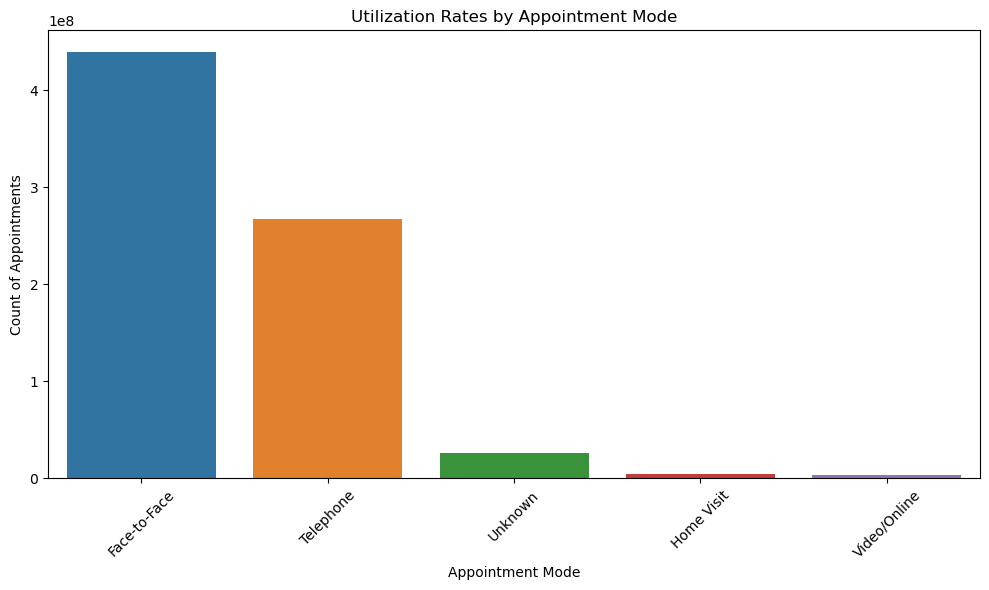

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by appointment mode to find the sum of appointments
appointment_mode_utilization = ar.groupby('appointment_mode').agg({
    'count_of_appointments': 'sum'
}).reset_index().sort_values(by='count_of_appointments', ascending=False)

# Creating a bar plot for the appointment modes utilization
plt.figure(figsize=(10, 6))
sns.barplot(data=appointment_mode_utilization, x='appointment_mode', y='count_of_appointments')
plt.title('Utilization Rates by Appointment Mode')
plt.xlabel('Appointment Mode')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('appointment_mode_utilization.png')
plt.show()

### Observations:
#### Utilization Rates by Appointment Mode:
Face-to-Face appointments have the highest utilization, followed by Telephone and Unknown modes.
Home Visits and Video/Online appointments have lower utilization rates, suggesting these modes are less frequently used.
### Recommendations:
#### Optimizing Appointment Modes:
Encourage the use of underutilized modes like Home Visits and Video/Online where appropriate, to balance the load and improve accessibility.

In [28]:
# Assuming 'appointment_status' "DNA" indicates a missed appointment (Did not attend)
# Group by region, month, and appointment status to find the sum of appointments
missed_appointments_rate = ar.groupby(['icb_ons_code', 'appointment_month', 'appointment_status']).agg({
    'count_of_appointments': 'sum'
}).reset_index()

# Filter for missed appointments based on the "DNA" status
missed_appointments_rate = missed_appointments_rate[missed_appointments_rate['appointment_status'] == 'DNA']

# Calculate the total number of appointments for each region and month
total_appointments = ar.groupby(['icb_ons_code', 'appointment_month'])['count_of_appointments'].sum().reset_index()

# Merge the total appointments with the missed appointments data
missed_appointments_rate = pd.merge(missed_appointments_rate, total_appointments, on=['icb_ons_code', 'appointment_month'], suffixes=('_missed', '_total'))

# Calculate the missed appointments rate
missed_appointments_rate['missed_appointments_rate'] = missed_appointments_rate['count_of_appointments_missed'] / missed_appointments_rate['count_of_appointments_total']

# Print the resulting DataFrame
print(missed_appointments_rate)

     icb_ons_code appointment_month appointment_status  \
0       E54000008           2020-01                DNA   
1       E54000008           2020-02                DNA   
2       E54000008           2020-03                DNA   
3       E54000008           2020-04                DNA   
4       E54000008           2020-05                DNA   
...           ...               ...                ...   
1255    E54000062           2022-02                DNA   
1256    E54000062           2022-03                DNA   
1257    E54000062           2022-04                DNA   
1258    E54000062           2022-05                DNA   
1259    E54000062           2022-06                DNA   

      count_of_appointments_missed  count_of_appointments_total  \
0                            63134                      1193082   
1                            58889                      1047799   
2                            60158                      1040457   
3                            26253 

In [29]:
# Filter for missed appointments
missed_appointments = ar[ar['appointment_status'] == 'DNA']

# Common characteristics
common_characteristics = missed_appointments.groupby(['appointment_month', 'appointment_mode']).size().reset_index(name='counts')

# Print the common characteristics of missed appointments
print(common_characteristics)

    appointment_month appointment_mode  counts
0             2020-01     Face-to-Face    1766
1             2020-01       Home Visit     877
2             2020-01        Telephone    1493
3             2020-01          Unknown    1079
4             2020-01     Video/Online     657
..                ...              ...     ...
145           2022-06     Face-to-Face    1911
146           2022-06       Home Visit     842
147           2022-06        Telephone    1729
148           2022-06          Unknown     708
149           2022-06     Video/Online     517

[150 rows x 3 columns]


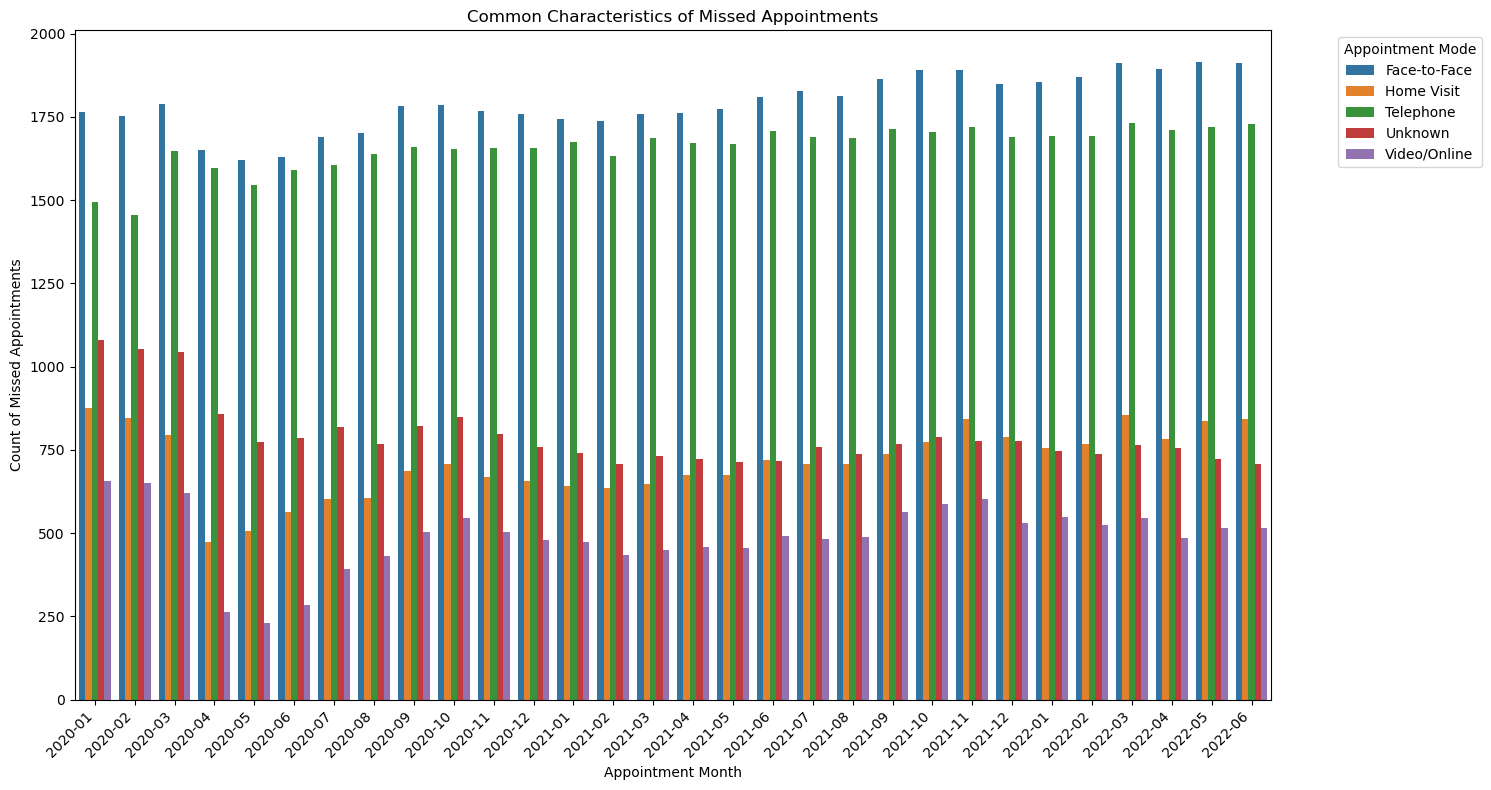

In [30]:
# Create a bar plot for the common characteristics of missed appointments
plt.figure(figsize=(15, 8))
sns.barplot(data=common_characteristics, x='appointment_month', y='counts', hue='appointment_mode')
plt.title('Common Characteristics of Missed Appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Missed Appointments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('common_characteristics_missed_appointments.png')
plt.show()

### Observations:
#### Face-to-Face Appointments:
Face-to-Face appointments have consistently high counts of missed appointments across all months.
This suggests that in-person appointments are more prone to being missed compared to other modes.
#### Home Visits and Telephone Appointments:
Home Visits and Telephone appointments also show significant counts of missed appointments.
However, these are generally lower than the counts for Face-to-Face appointments.
#### Video/Online and Unknown Modes:
Video/Online appointments have the lowest counts of missed appointments, which could indicate better adherence due to convenience.

### Recommendations:
#### Enhance Reminder Systems:
Implement and improve reminder systems, especially for Face-to-Face and Telephone appointments, to reduce missed appointments.
Use multiple channels such as SMS, email, and phone calls to ensure patients are reminded of their appointments.
#### Flexible Rescheduling Options:
Provide easy and flexible options for rescheduling appointments, particularly for in-person visits.
#### Promote Video/Online Appointments:
Given the lower missed appointment rates for Video/Online modes, promote these options where appropriate to improve overall adherence.

In [31]:
# Monthly and Seasonal Trends in Service Utilization
# Group by month and year
monthly_trends = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
print(monthly_trends)

   appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078


In [32]:
# Comparison of Service Settings, Context Types, and National Categories
# Group by service settings, context types, and national categories
service_utilization_comparison = nc.groupby(['service_setting', 'context_type', 'national_category']).agg({
    'count_of_appointments': 'sum'
}).reset_index()

print(service_utilization_comparison)

              service_setting            context_type  \
0   Extended Access Provision  Care Related Encounter   
1   Extended Access Provision  Care Related Encounter   
2   Extended Access Provision  Care Related Encounter   
3   Extended Access Provision  Care Related Encounter   
4   Extended Access Provision  Care Related Encounter   
..                        ...                     ...   
64       Primary Care Network  Care Related Encounter   
65       Primary Care Network  Care Related Encounter   
66       Primary Care Network  Care Related Encounter   
67       Primary Care Network    Inconsistent Mapping   
68                   Unmapped                Unmapped   

                                    national_category  count_of_appointments  
0   Care Home Needs Assessment & Personalised Care...                   2798  
1                                     Care Home Visit                   8328  
2                                     Clinical Triage                 382876  

# 

## III. Exploratory data analysis

**Question 1:** Between what dates were appointments scheduled? 

In [33]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [34]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [35]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# View the DataFrame.
print(ad['appointment_date'].head())

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]


In [36]:
# Change the format of ar['appointment_date'] to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# View the DataFrame.
print(ar.info())
print(ar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB
None
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034        2020-01-01           Attended       GP     Face-to-Face   
1    

In [37]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
def determine_min_max_dates(df, date_column):
    """
    Determine the minimum and maximum dates in a specified date column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the date column.
    date_column (str): The name of the date column to analyze.
    
    Returns:
    tuple: A tuple containing the minimum and maximum dates in the date column.
    """
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    return min_date, max_date

# Determine the minimum and maximum dates in the ad DataFrame
min_date, max_date = determine_min_max_dates(ad, 'appointment_date')

# Print the results
print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")


Minimum date: 2021-12-01 00:00:00
Maximum date: 2022-06-30 00:00:00


In [38]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
def determine_min_max_dates(df, date_column):
    """
    Determine the minimum and maximum dates in a specified date column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the date column.
    date_column (str): The name of the date column to analyze.
    
    Returns:
    tuple: A tuple containing the minimum and maximum dates in the date column.
    """
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    return min_date, max_date

# Determine the minimum and maximum dates in the nc DataFrame
min_date, max_date = determine_min_max_dates(nc, 'appointment_date')

# Print the results
print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2021-08-01 00:00:00
Maximum date: 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [39]:
# Define the function to determine if a string contains the phrase "NHS North West London"
def contains_nhs_north_west_london(x):
    y = x.lower()
    return "nhs north west london" in y

# Example usage of the function
print(contains_nhs_north_west_london(x="NHS North West London"))  # This will print: True

# Apply the function to the 'sub_icb_location_name' column
fc = nc['sub_icb_location_name'].apply(contains_nhs_north_west_london)

# View the resulting Series
print(fc)

# Count the number of products that contain the phrase "NHS North West London"
count_nhs_north_west_london = fc.sum()
print(f"Number of records that contain 'NHS North West London': {count_nhs_north_west_london}")

# Display the filtered DataFrame as a table
filtered_nc = nc[fc]
print(filtered_nc)

True
0         False
1         False
2         False
3         False
4         False
          ...  
817389    False
817390    False
817391    False
817392    False
817393    False
Name: sub_icb_location_name, Length: 817394, dtype: bool
Number of records that contain 'NHS North West London': 13007
       appointment_date icb_ons_code              sub_icb_location_name  \
794321       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794322       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794323       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794324       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
794325       2021-08-01    E54000027  NHS North West London ICB - W2U3Z   
...                 ...          ...                                ...   
807323       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807324       2022-06-30    E54000027  NHS North West London ICB - W2U3Z   
807325       2022-06-30  

In [40]:
# Define the function to determine if a string contains the phrase "NHS North West London"
def contains_nhs_north_west_london(x):
    y = x.lower()
    return "nhs north west london" in y

# Apply the function to the 'sub_icb_location_name' column
fc = nc['sub_icb_location_name'].apply(contains_nhs_north_west_london)

# Filter the DataFrame to include only rows with "NHS North West London" in the 'sub_icb_location_name' column
filtered_nc = nc[fc]

# Further filter the DataFrame for the date range from 1 January to 1 June 2022
filtered_nc = filtered_nc[
    (filtered_nc['appointment_date'] >= '2022-01-01') &
    (filtered_nc['appointment_date'] <= '2022-06-01')
]

# Group by service setting and count the number of records
grouped_service_setting = filtered_nc.groupby('service_setting').size().reset_index(name='count')

# Determine the most popular service setting
most_popular_service_setting = grouped_service_setting.loc[grouped_service_setting['count'].idxmax()]

# View the output
print(grouped_service_setting)
print(f"The most popular service setting is: {most_popular_service_setting['service_setting']} \
        with {most_popular_service_setting['count']} records")

             service_setting  count
0  Extended Access Provision   1090
1           General Practice   2104
2                      Other   1318
3       Primary Care Network   1272
4                   Unmapped    152
The most popular service setting is: General Practice         with 2104 records


**Question 3:** Which month had the highest number of appointments?

In [41]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Extract year and month from 'appointment_date'
nc['Year'] = nc['appointment_date'].dt.year
nc['Month'] = nc['appointment_date'].dt.month

# Group by year and month, and calculate the total number of appointments per month
monthly_appointments = nc.groupby(['Year', 'Month'])['count_of_appointments'].sum().reset_index()

# Rename the columns for clarity
monthly_appointments.columns = ['Year', 'Month', 'Total_Appointments']

# Sort the results based on the total number of appointments
sorted_monthly_appointments = monthly_appointments.sort_values(by='Total_Appointments', ascending=False)

# View the sorted results
print(sorted_monthly_appointments)

# Find the month with the highest number of appointments
most_appointments = sorted_monthly_appointments.iloc[0]
print(f"The month with the highest number of appointments is: {most_appointments['Year']}-{most_appointments['Month']} with {most_appointments['Total_Appointments']} appointments")

    Year  Month  Total_Appointments
3   2021     11            30405070
2   2021     10            30303834
7   2022      3            29595038
1   2021      9            28522501
9   2022      5            27495508
10  2022      6            25828078
5   2022      1            25635474
6   2022      2            25355260
4   2021     12            25140776
8   2022      4            23913060
0   2021      8            23852171
The month with the highest number of appointments is: 2021-11 with 30405070 appointments


**Question 4:** What was the total number of records per month?

In [42]:
#For nc data frame:
# Create new columns for year and month from 'appointment_date'
nc['Year'] = nc['appointment_date'].dt.year
nc['Month'] = nc['appointment_date'].dt.month

# Group by year and month, and sum the 'count_of_appointments' column
monthly_appointments = nc.groupby(['Year', 'Month'])['count_of_appointments'].sum().reset_index(name='Total_Appointments')

# Sort the results based on the total number of appointments in descending order
sorted_monthly_appointments = monthly_appointments.sort_values(by='Total_Appointments', ascending=False)

# View the sorted results
print(sorted_monthly_appointments)

# Find the month with the highest number of appointments
most_appointments = sorted_monthly_appointments.iloc[0]
print(f"The month with the highest number of appointments is: {most_appointments['Year']}-{most_appointments['Month']} with {most_appointments['Total_Appointments']} appointments")

    Year  Month  Total_Appointments
3   2021     11            30405070
2   2021     10            30303834
7   2022      3            29595038
1   2021      9            28522501
9   2022      5            27495508
10  2022      6            25828078
5   2022      1            25635474
6   2022      2            25355260
4   2021     12            25140776
8   2022      4            23913060
0   2021      8            23852171
The month with the highest number of appointments is: 2021-11 with 30405070 appointments


In [43]:
#For ad data frame:
# Create new columns for year and month from 'appointment_date'
ad['Year'] = ad['appointment_date'].dt.year
ad['Month'] = ad['appointment_date'].dt.month

# Group by year and month, and sum the 'count_of_appointments' column
monthly_appointments_ad = ad.groupby(['Year', 'Month'])['count_of_appointments'].sum().reset_index(name='Total_Appointments')

# Sort the results based on the total number of appointments in descending order
sorted_monthly_appointments_ad = monthly_appointments_ad.sort_values(by='Total_Appointments', ascending=False)

# View the sorted results
print("DataFrame ad:")
print(sorted_monthly_appointments_ad)

# Find the month with the highest number of appointments
most_appointments_ad = sorted_monthly_appointments_ad.iloc[0]
print(f"The month with the highest number of appointments in 'ad' is: {most_appointments_ad['Year']}-{most_appointments_ad['Month']} with {most_appointments_ad['Total_Appointments']} appointments")

DataFrame ad:
   Year  Month  Total_Appointments
3  2022      3            27170002
5  2022      5            25343941
6  2022      6            23715317
1  2022      1            23597196
2  2022      2            23351939
0  2021     12            22853483
4  2022      4            21948814
The month with the highest number of appointments in 'ad' is: 2022-3 with 27170002 appointments


In [44]:
#For ar data frame:
# Group by 'appointment_month' and sum the 'count_of_appointments' column
monthly_appointments_ar = ar.groupby(ar['appointment_month'])['count_of_appointments'].sum().reset_index(name='Total_Appointments')

# Sort the results based on the total number of appointments in descending order
sorted_monthly_appointments_ar = monthly_appointments_ar.sort_values(by='Total_Appointments', ascending=False)

# View the sorted results
print("DataFrame ar:")
print(sorted_monthly_appointments_ar)

# Find the month with the highest number of appointments
most_appointments_ar = sorted_monthly_appointments_ar.iloc[0]
print(f"The month with the highest number of appointments in 'ar' is: {most_appointments_ar['appointment_month'].strftime('%Y-%m')} with {most_appointments_ar['Total_Appointments']} appointments")


DataFrame ar:
   appointment_month  Total_Appointments
22        2021-11-01            30405070
21        2021-10-01            30303834
26        2022-03-01            29595038
20        2021-09-01            28522501
9         2020-10-01            28301932
28        2022-05-01            27495508
14        2021-03-01            27225424
0         2020-01-01            27199296
17        2021-06-01            26784182
8         2020-09-01            26714255
29        2022-06-01            25828078
18        2021-07-01            25739219
24        2022-01-01            25635474
25        2022-02-01            25355260
23        2021-12-01            25140776
10        2020-11-01            25061602
1         2020-02-01            24104621
2         2020-03-01            24053468
27        2022-04-01            23913060
15        2021-04-01            23879932
19        2021-08-01            23852171
11        2020-12-01            23535936
16        2021-05-01            23508395
12

# 

## IV. Visual techniques for exploring and communicating patterns in the data

In [45]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

**Visualisations:**

In [46]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc = pd.read_excel('national_categories.xlsx')

nc['appointment_month'] = nc['appointment_month'].astype(str)

In [47]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output.
print(nc_ss.head())

  appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843


**Service settings:**

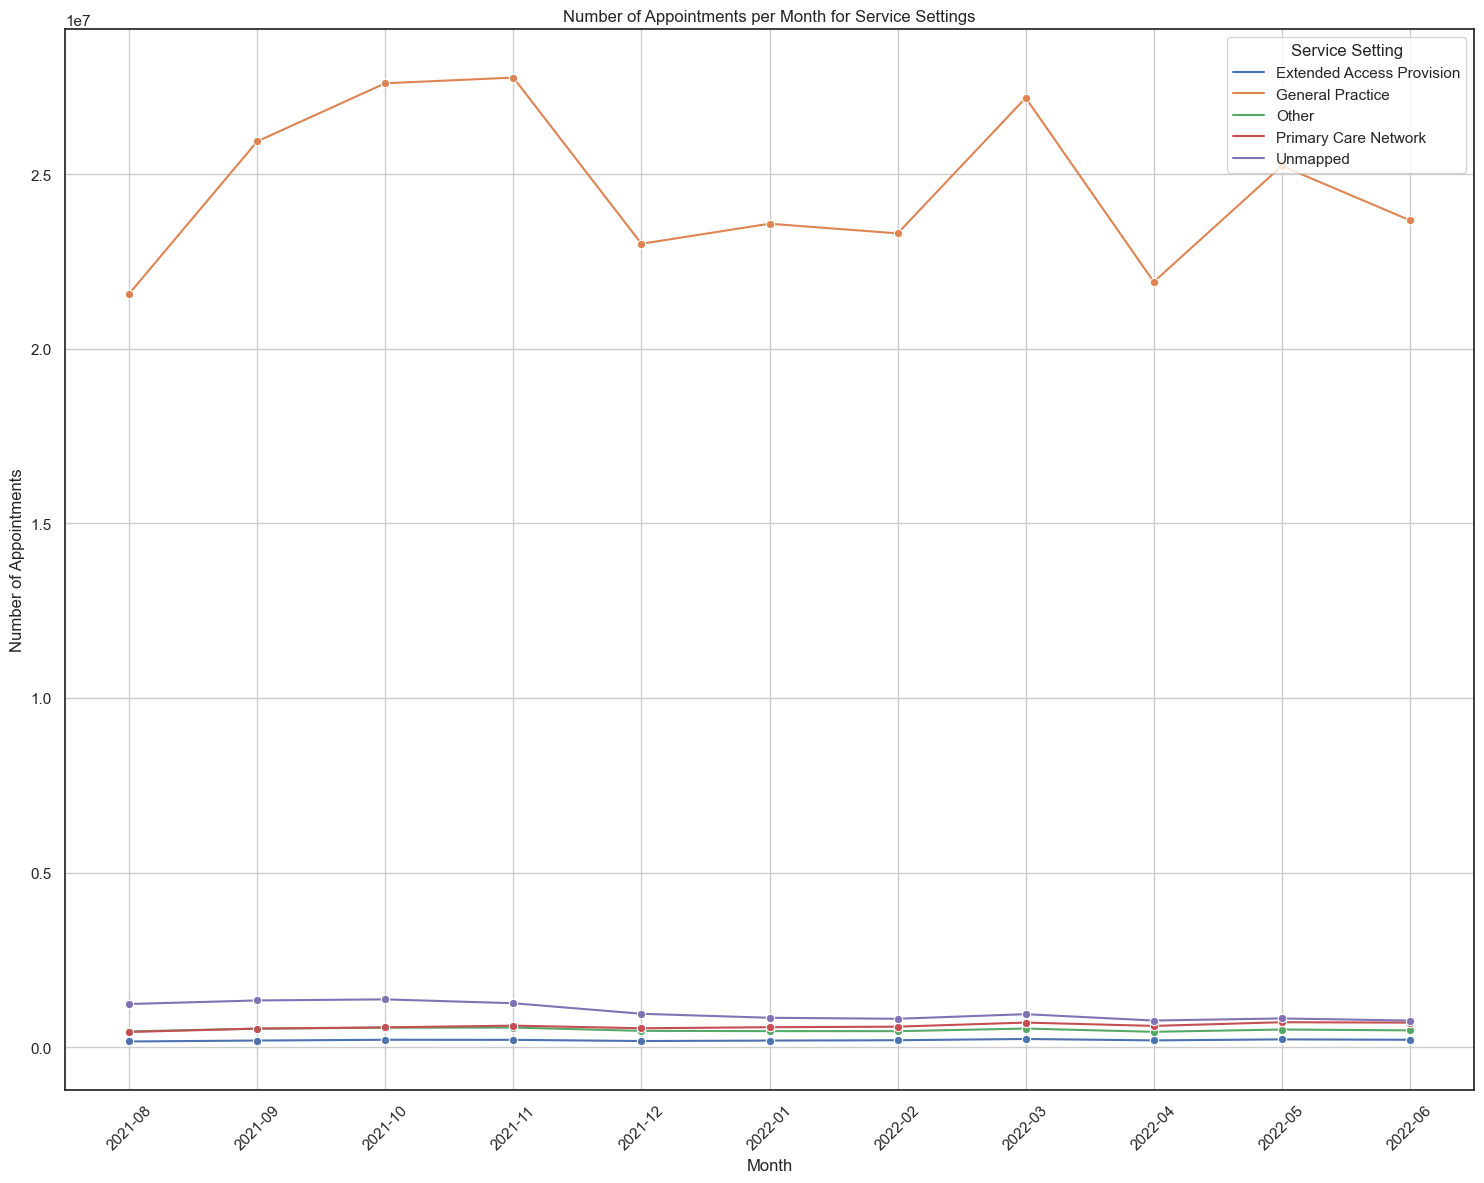

In [48]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.set_style("white")
plt.figure(figsize=(15, 12))
sns.lineplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='service_setting', marker='o', ci=None)
plt.title('Number of Appointments per Month for Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Service Setting', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file with 300 dpi
plt.savefig('service_setting.png', dpi=300)

plt.show()

### Trend Analysis:
1. The number of appointments for “General Practice” is consistently high across all months.
2. There are noticeable peaks in appointments in July 2021, October 2021, and March 2022.
3. The overall trend shows fluctuations, indicating varying demand across different months.
### Key Insights:
1. “General Practice” dominates the number of appointments, highlighting its critical role in primary healthcare.
2. Peaks in specific months could be associated with seasonal changes, public holidays, or policy changes affecting healthcare access.
3. Fluctuations suggest that resource allocation for “General Practice” should be dynamic to accommodate changing demands.

**Context types:**

In [49]:
# Create a separate data set that can be used in future weeks. 
# View the output.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()
print(nc_ct.head())

  appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135


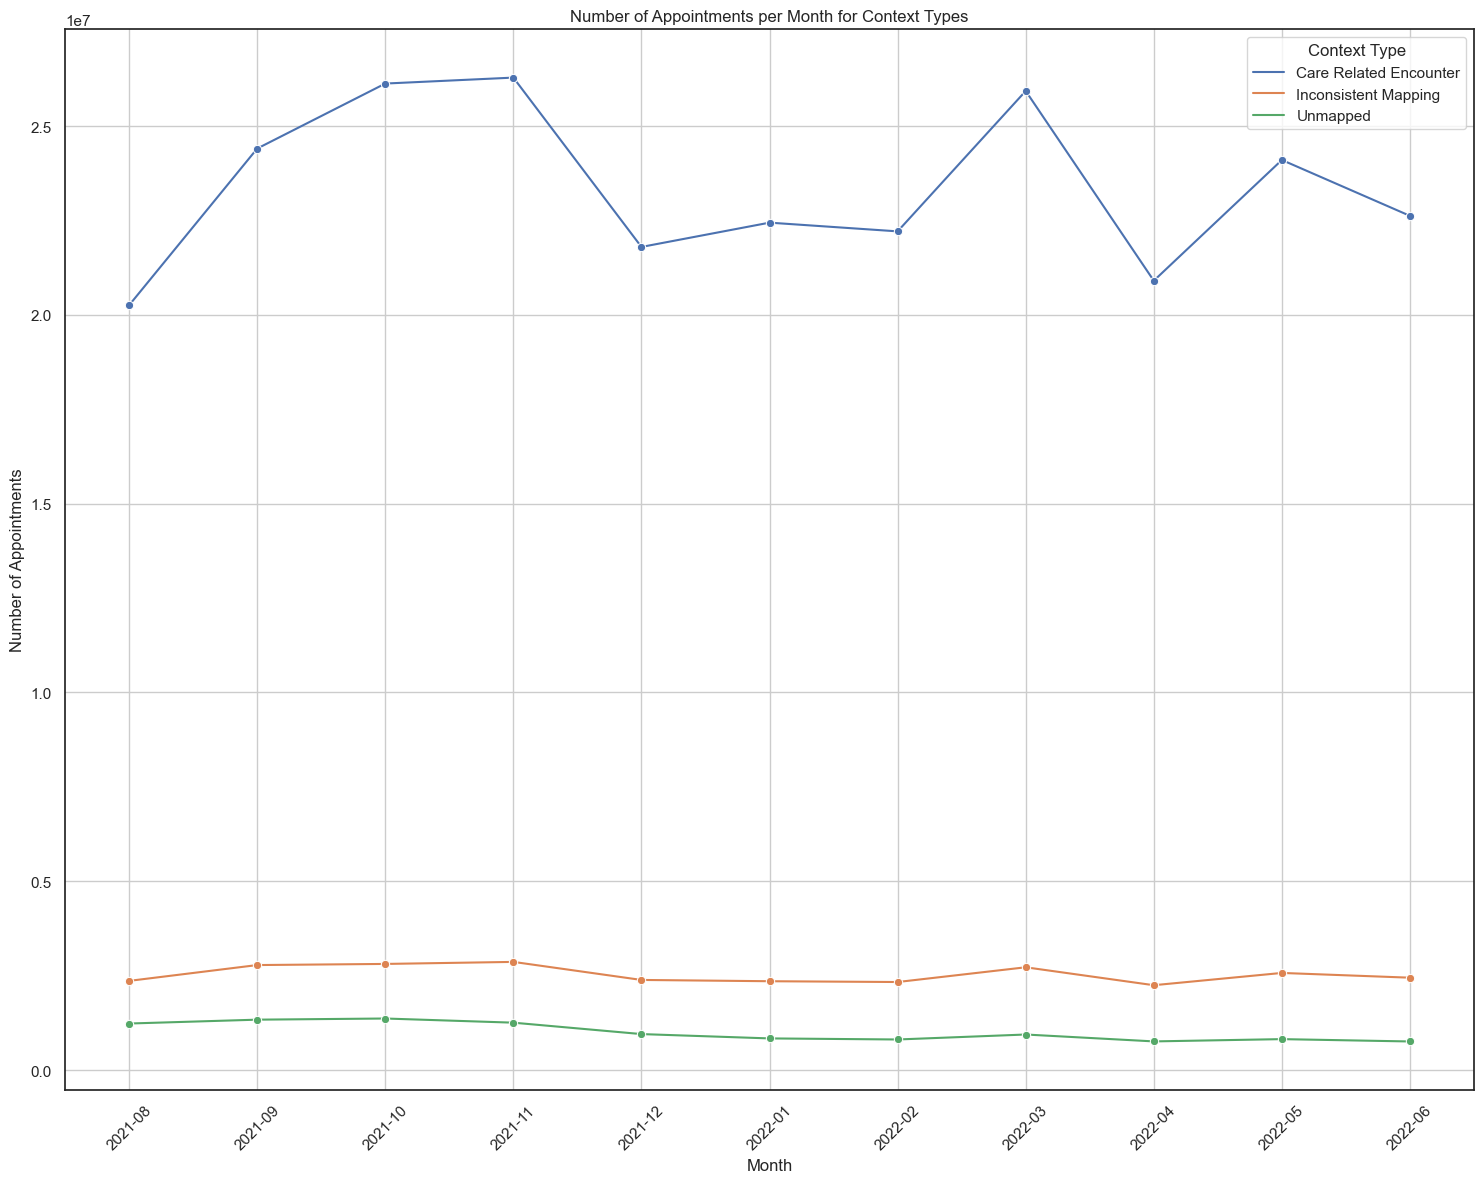

In [50]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(data=nc_ct, x='appointment_month', y='count_of_appointments', hue='context_type', marker='o', ci=None)
plt.title('Number of Appointments per Month for Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='Context Type', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file with 300 dpi
plt.savefig('context_types.png', dpi=300)

plt.show()

### Trend Analysis:
1. “Care Related Encounter” has the highest number of appointments, with significant peaks in July 2021, October 2021, and March 2022.
2. “Inconsistent Mapping” and “Unmapped” categories have relatively stable and lower appointment numbers.
### Key Insights:
1. The dominance of “Care Related Encounter” appointments indicates a strong focus on direct patient care.
2. Stability in the “Inconsistent Mapping” and “Unmapped” categories suggests they play a minor role in the overall appointment trends.
3. Healthcare providers should continue to prioritize resources for “Care Related Encounter” appointments to meet patient needs effectively.

**National categories:**

In [51]:
# Create a separate data set that can be used in future weeks. 
# View the output.
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()
print(nc_nc.head())

  appointment_month                                  national_category  \
0           2021-08  Care Home Needs Assessment & Personalised Care...   
1           2021-08                                    Care Home Visit   
2           2021-08                                    Clinical Triage   
3           2021-08                         General Consultation Acute   
4           2021-08                       General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045  


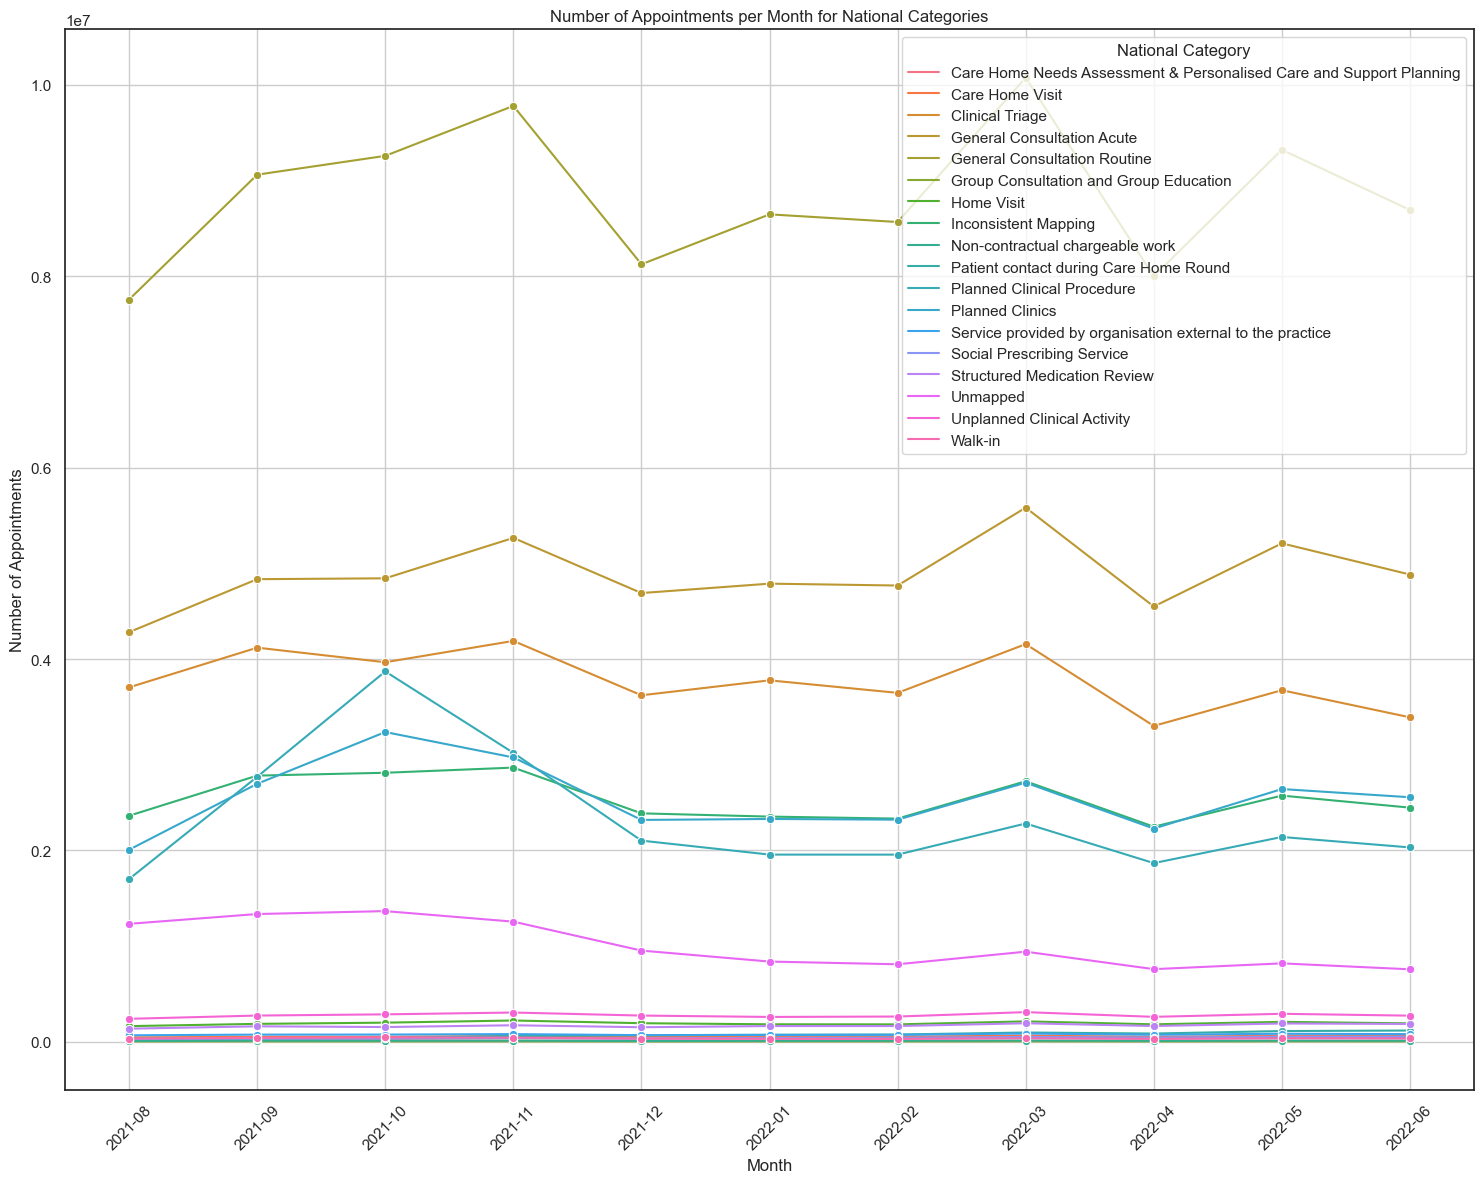

In [52]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(15, 12))
sns.lineplot(data=nc_nc, x='appointment_month', y='count_of_appointments', hue='national_category', marker='o', ci=None)
plt.title('Number of Appointments per Month for National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend(title='National Category', loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file with 300 dpi
plt.savefig('national_categories.png', dpi=300)

plt.show()

### Trend Analysis:
1. Categories such as “General Consultation Acute” and “General Consultation Routine” have the highest number of appointments, showing consistent trends.
2. There are noticeable peaks in several categories around October 2021 and March 2022.
### Key Insights:
1. “General Consultation Acute” and “General Consultation Routine” are critical areas requiring consistent resource allocation.
2. The peaks in October 2021 and March 2022 suggest possible seasonal or policy-driven increases in healthcare demand.
3. Categories like “Planned Clinical Procedure” and “Planned Clinics” also show consistent appointment numbers, indicating steady demand for these services.

## Overall Conclusion

1. General Trends: Across all categories, there are noticeable peaks in July 2021, October 2021, and March 2022. These peaks could be influenced by seasonal factors, public health policies, or societal events impacting healthcare access and demand.
2. Resource Allocation: “General Practice” and “Care Related Encounter” consistently dominate appointment numbers, indicating the need for prioritized resource allocation to these areas.
3. Healthcare Planning: The data suggests that healthcare providers should anticipate and prepare for fluctuations in appointment numbers, particularly during peak months, to ensure efficient service delivery and resource utilization.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

In [53]:
# Define the seasons
seasons = {
    'Summer': ['2021-06', '2021-07', '2021-08'],
    'Autumn': ['2021-09', '2021-10', '2021-11'],
    'Winter': ['2021-12', '2022-01', '2022-02'],
    'Spring': ['2022-03', '2022-04', '2022-05']
}

In [54]:
# Map months to seasons
nc['season'] = nc['appointment_month'].map(
    lambda x: next((season for season, months in seasons.items() if x in months), 'Other')
)

In [55]:
# Filter out 'Other' season entries
nc_seasonal = nc[nc['season'] != 'Other']

In [56]:
# Aggregate the appointments per season and determine the sum of the appointments per season
nc_ss_day = nc_seasonal.groupby(['season', 'appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

In [57]:
# Set the plot style
sns.set_style("white")

In [58]:
# Function to create and visualize the dataset for each season
def create_and_plot_season(season_name):
    # Filter the data for the specified season
    season_data = nc_ss_day[nc_ss_day['season'] == season_name]
    
    # View the output
    print(f"{season_name} Data:\n", season_data.head())
    
    # Visualize the subset using a lineplot
    plt.figure(figsize=(15, 12))
    sns.lineplot(data=season_data, x='appointment_month', y='count_of_appointments', hue='service_setting', marker='o', ci=None)
    plt.title(f'Number of Appointments per Month for Service Settings - {season_name}')
    plt.xlabel('Month')
    plt.ylabel('Number of Appointments')
    plt.legend(title='Service Setting', loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.savefig(f'appointments_{season_name.lower()}.png', dpi=300)
    
    plt.show()

## Summer


Summer Data:
     season appointment_month            service_setting  count_of_appointments
30  Summer           2021-08  Extended Access Provision                 160927
31  Summer           2021-08           General Practice               21575852
32  Summer           2021-08                      Other                 449101
33  Summer           2021-08       Primary Care Network                 432448
34  Summer           2021-08                   Unmapped                1233843


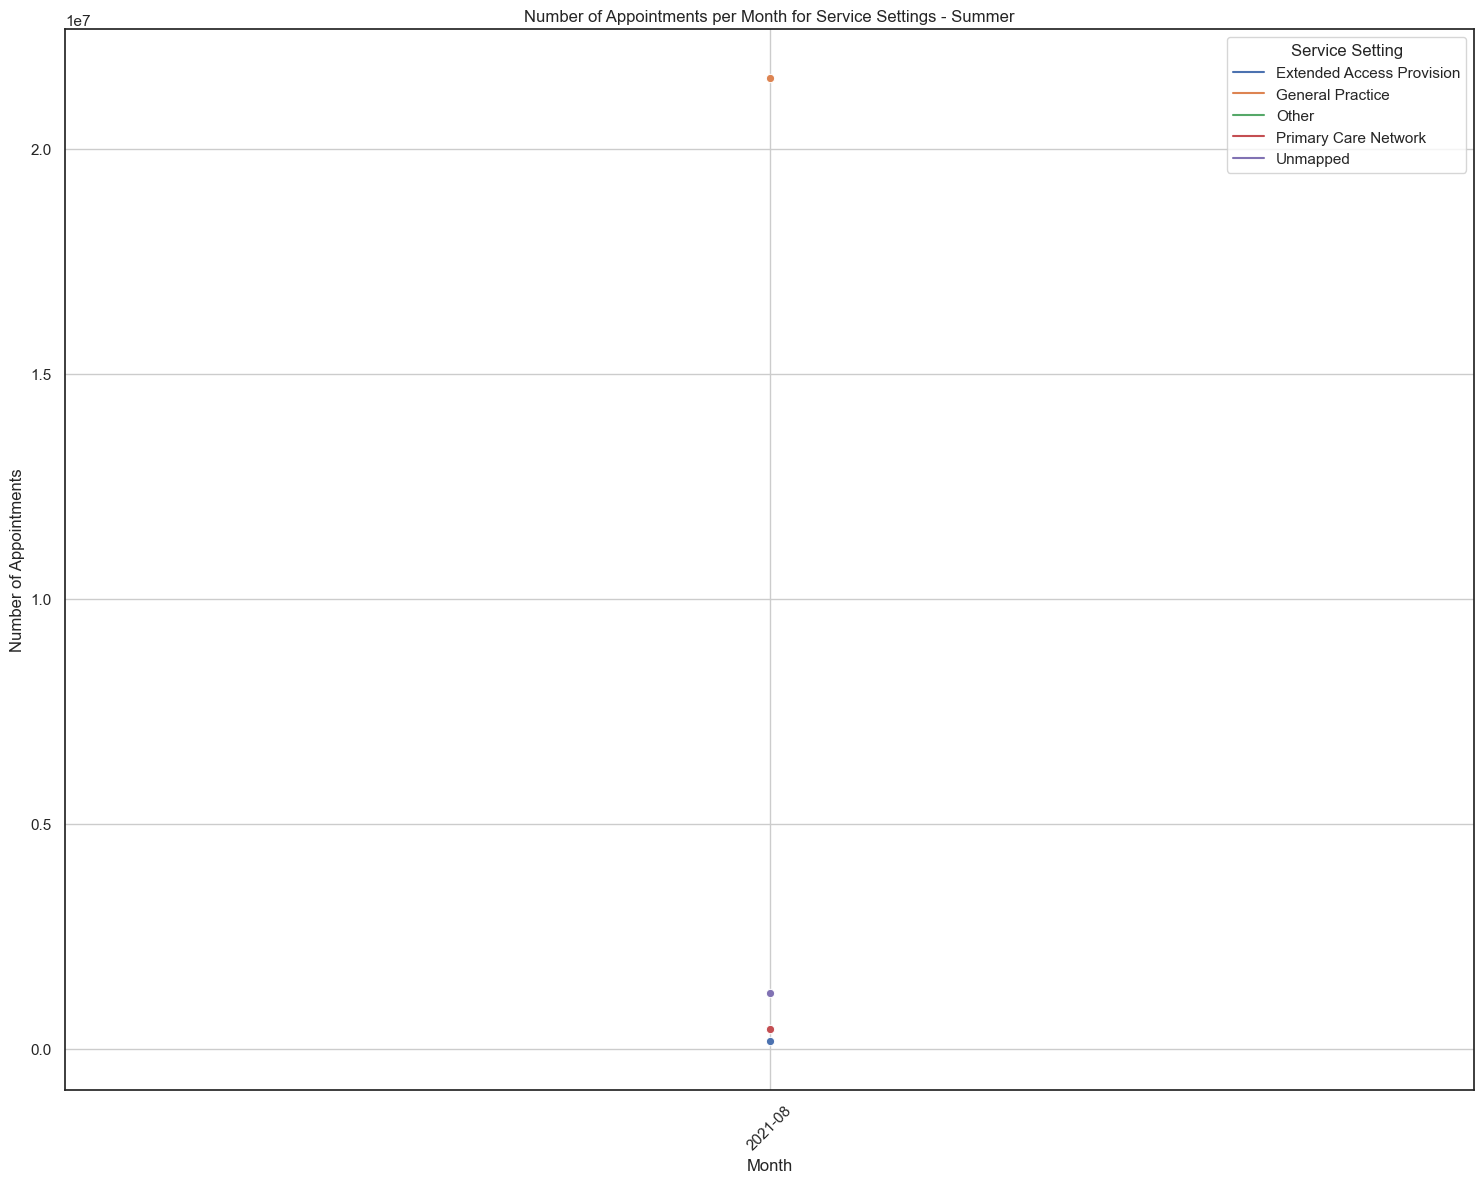

In [59]:
# Summer lineplot
create_and_plot_season('Summer')

### Trend Analysis:
1. The number of appointments generally increases from June to July and then slightly decreases or stabilizes in August.
2. Service settings like “General Practice” show a significant number of appointments consistently, indicating high utilization during summer months.
### Key Insights:
1. The increase in appointments during July might be related to seasonal factors such as summer holidays when people have more time to visit healthcare providers.
2. The consistent demand for general practice highlights its critical role during the summer months.

## Autumn

Autumn Data:
    season appointment_month            service_setting  count_of_appointments
0  Autumn           2021-09  Extended Access Provision                 187906
1  Autumn           2021-09           General Practice               25940821
2  Autumn           2021-09                      Other                 527174
3  Autumn           2021-09       Primary Care Network                 530485
4  Autumn           2021-09                   Unmapped                1336115


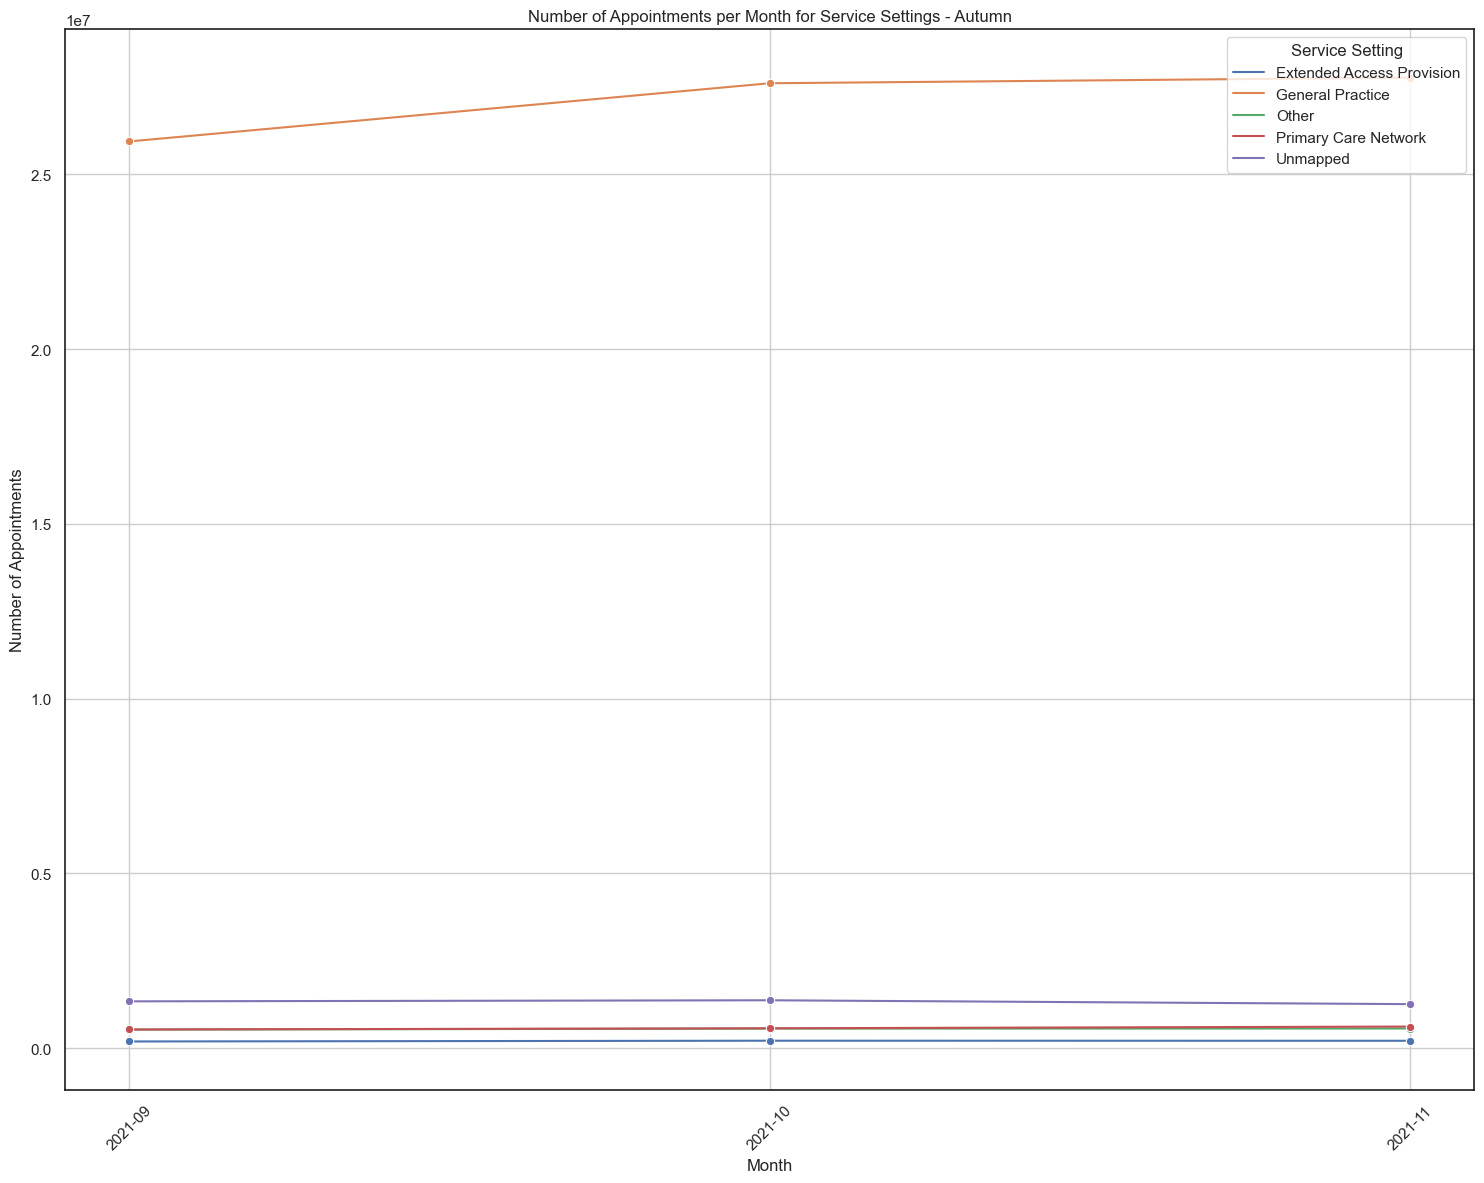

In [60]:
# Autumn
create_and_plot_season('Autumn')

### Trend Analysis:
1. There is a noticeable increase in the number of appointments from September to November.
2. General Practice” and “Primary Care Network” show a higher volume of appointments, particularly in November.
### Key Insights:
1. The rise in appointments in autumn could be associated with the start of the school year and people addressing health issues before the winter season.
2. The peak in November might indicate an end-of-year rush to utilize healthcare benefits or prepare for the winter season.

## Winter:

Winter Data:
     season appointment_month            service_setting  count_of_appointments
35  Winter           2021-12  Extended Access Provision                 173504
36  Winter           2021-12           General Practice               23008818
37  Winter           2021-12                      Other                 464718
38  Winter           2021-12       Primary Care Network                 539479
39  Winter           2021-12                   Unmapped                 954257


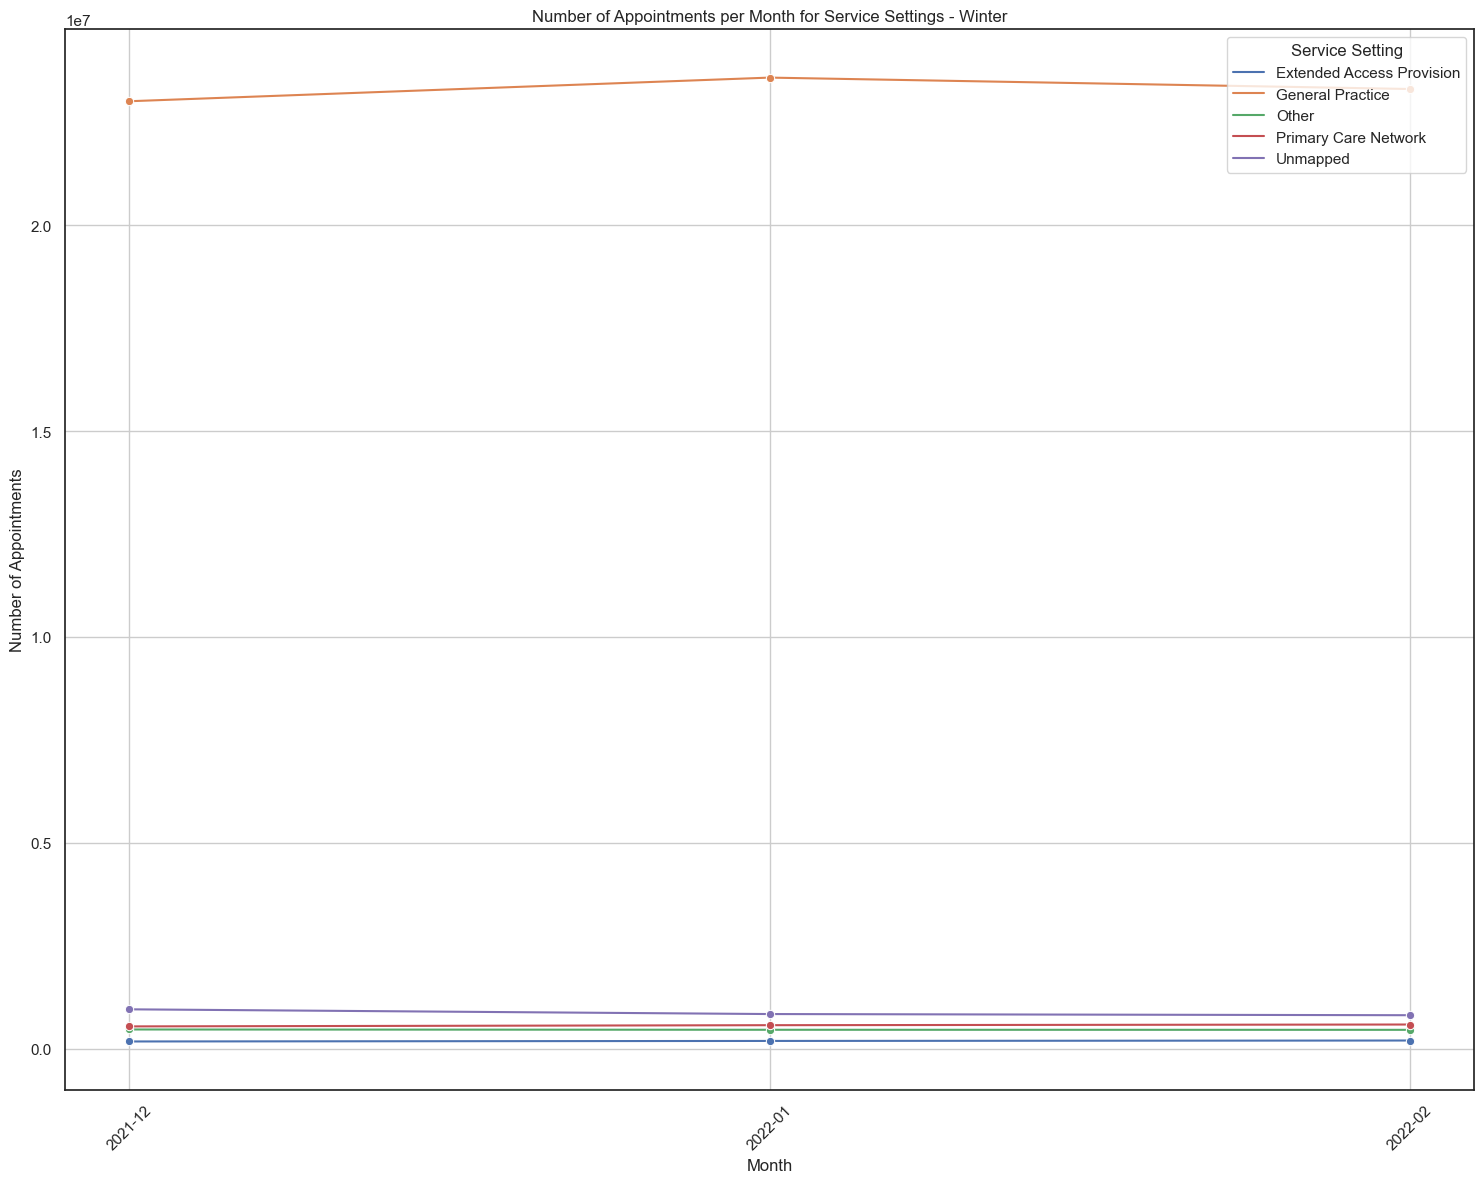

In [61]:
# Winter
create_and_plot_season('Winter')

### Trend Analysis:
1. The number of appointments peaks in December and January, then drops in February.
2. Service settings such as “General Practice” and “Care Related Encounter” show the highest number of appointments during these months.
### Key Insights:
1. The high volume of appointments in December and January can be attributed to seasonal illnesses such as colds and flu.
2. The drop in February may be due to fewer illnesses or people avoiding healthcare visits post-holiday season.

## Spring

Spring Data:
     season appointment_month            service_setting  count_of_appointments
15  Spring           2022-03  Extended Access Provision                 231905
16  Spring           2022-03           General Practice               27187368
17  Spring           2022-03                      Other                 530677
18  Spring           2022-03       Primary Care Network                 702176
19  Spring           2022-03                   Unmapped                 942912


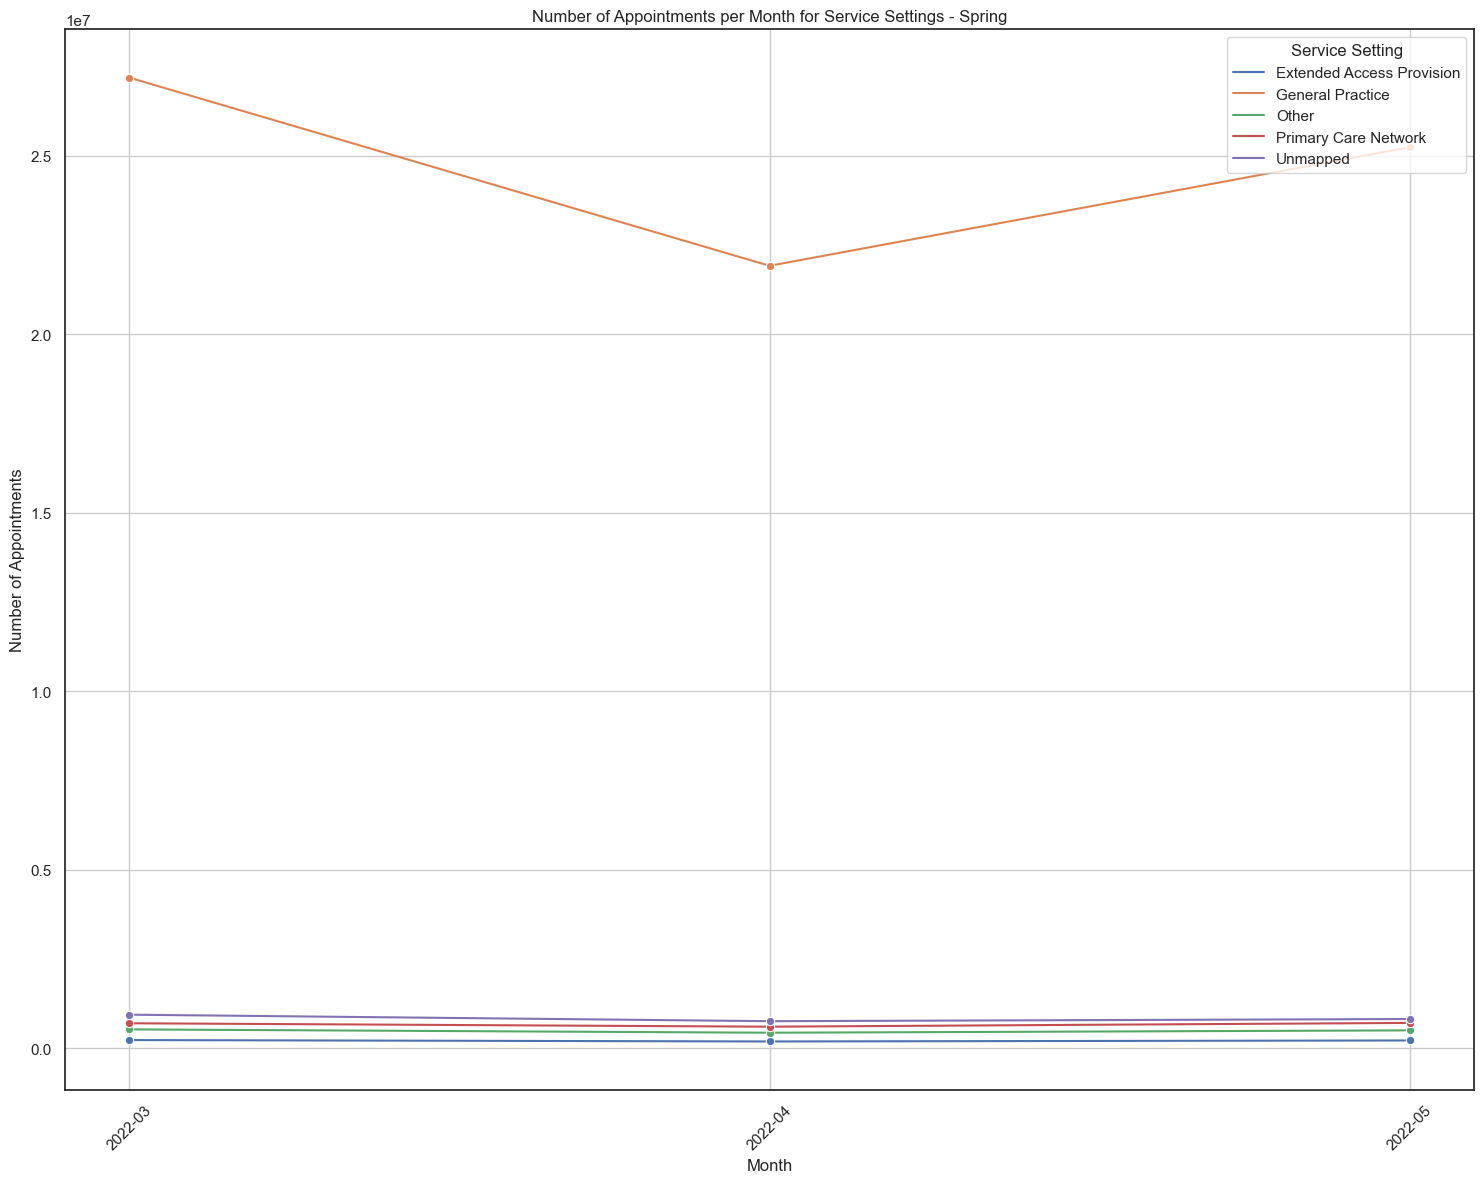

In [62]:
# Spring
create_and_plot_season('Spring')

### Trend Analysis:
1. There is a steady increase in the number of appointments from March to May.
2. “General Practice” continues to show the highest number of appointments, with a noticeable peak in May.
### Key Insights:
1. The increase in appointments during spring may be due to people addressing health issues after winter and preparing for the summer.
2. The peak in May could be linked to seasonal allergies and pre-summer health check-ups.

## Overall Conclusion

1. General Practice Dominance: Across all seasons, “General Practice” consistently has the highest number of appointments, indicating its essential role in the healthcare system.
2. Seasonal Variations: The number of appointments varies by season, with noticeable peaks in specific months. These variations can be attributed to seasonal illnesses, holidays, school terms, and preparation for upcoming seasons.
3. Healthcare Utilization Patterns: Understanding these patterns can help healthcare providers allocate resources more efficiently and anticipate periods of high demand. This can lead to better patient care and optimized healthcare operations.

# 

## V. Twitter (X) analysis regarding tweets with hashtags related to healthcare in the UK

In [63]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [64]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.head())

              tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                  

In [65]:
# Set Pandas display options for better visualization
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', 100)  # Increase column width for better visibility

# Display the DataFrame
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': []...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #P...,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [12...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet...,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'s...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect informa...,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_n...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Trans...,"{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indic...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [66]:
# Explore the metadata and data set.
# Get summary statistics for numerical columns
print(tweets.describe())

# Get a concise summary of the DataFrame
print(tweets.info())

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   twe

In [67]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explore the 'tweet_retweet_count' column
retweet_counts = tweets['tweet_retweet_count'].value_counts()
print(retweet_counts)

# Explore the 'tweet_favorite_count' column
favorite_counts = tweets['tweet_favorite_count'].value_counts()
print(favorite_counts)

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


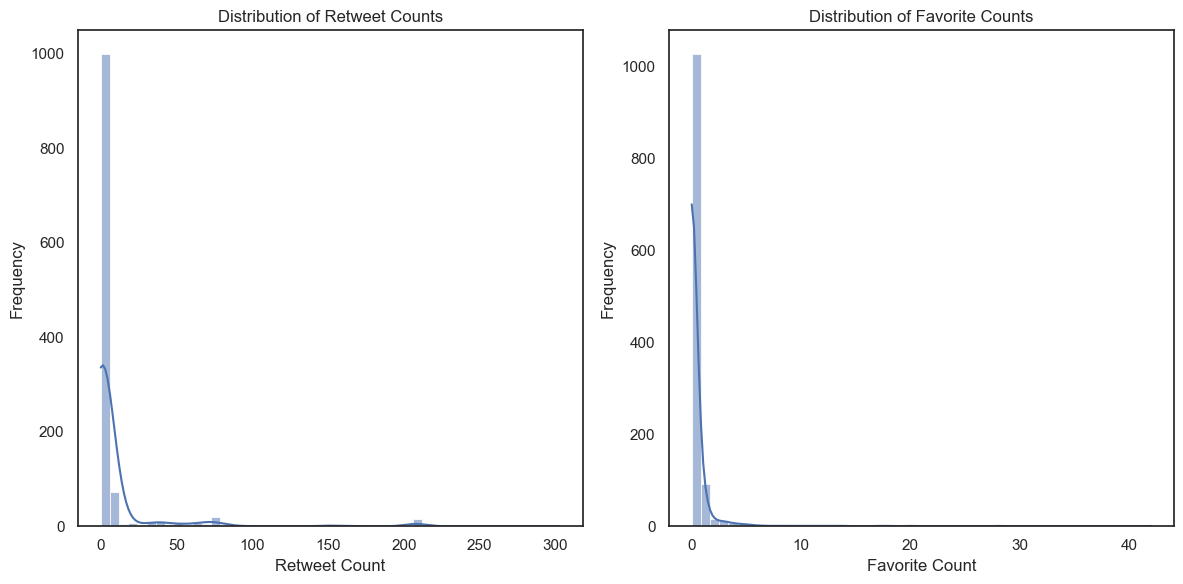

In [68]:
# Since we cannot draw any conclusions by only looking at these results, we have to explore further.
# Explore the distribution.
import seaborn as sns

# Plot histograms of retweet and favorite counts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(tweets['tweet_retweet_count'], bins=50, kde=True)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(tweets['tweet_favorite_count'], bins=50, kde=True)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations:

#### Skewed Distribution:
Both the retweet and favorite counts show a highly skewed distribution towards the lower end. Most tweets have very low retweet and favorite counts, with the majority falling close to zero.
#### Long Tail:
There is a long tail in both distributions, indicating that a small number of tweets receive significantly higher engagement (in terms of both retweets and favorites). This is typical in social media data, where a few posts tend to go viral and attract much more attention than others.
#### Outliers:
The presence of tweets with extremely high retweet and favorite counts compared to the rest of the data suggests the presence of outliers. These outliers might represent tweets that went viral or were part of a trending topic.
#### Low Engagement:
The vast majority of tweets have minimal engagement, which could suggest that either the content isn’t resonating well with the audience, or the account has a relatively small reach.
#### Potential Viral Content:
The few tweets with high engagement could be analyzed further to understand what makes them stand out. Factors could include the use of popular hashtags, mentions of influential users, or tweets that are part of a trending topic.


In [69]:
# Analyse high engagement tweets.
# Identify tweets with high retweet and favorite counts. 
# This can help us understand what kind of content is driving engagement.
# Define thresholds for high engagement
high_retweet_threshold = tweets['tweet_retweet_count'].quantile(0.95)
high_favorite_threshold = tweets['tweet_favorite_count'].quantile(0.95)

# Filter high engagement tweets
high_engagement_tweets = tweets[
    (tweets['tweet_retweet_count'] > high_retweet_threshold) |
    (tweets['tweet_favorite_count'] > high_favorite_threshold)
]

# Display the top 5 high engagement tweets
print(high_engagement_tweets[['tweet_full_text', 'tweet_retweet_count', 'tweet_favorite_count']].head())

# Display the first few high engagement tweets
high_engagement_tweets[['tweet_full_text', 'tweet_retweet_count', 'tweet_favorite_count']].head()

                                                                                        tweet_full_text  \
9                  You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥   
27  RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with ...   
38  RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” No...   
65  RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Ca...   
68  RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” No...   

    tweet_retweet_count  tweet_favorite_count  
9                     1                    28  
27                  207                     0  
38                   72                     0  
65                   85                     0  
68                   72                     0  


,tweet_full_text,tweet_retweet_count,tweet_favorite_count
9,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,1,28
27,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with ...",207,0
38,RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” No...,72,0
65,"RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Ca...",85,0
68,RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” No...,72,0


Correlation between retweet and favorite counts: -0.034960383164063545


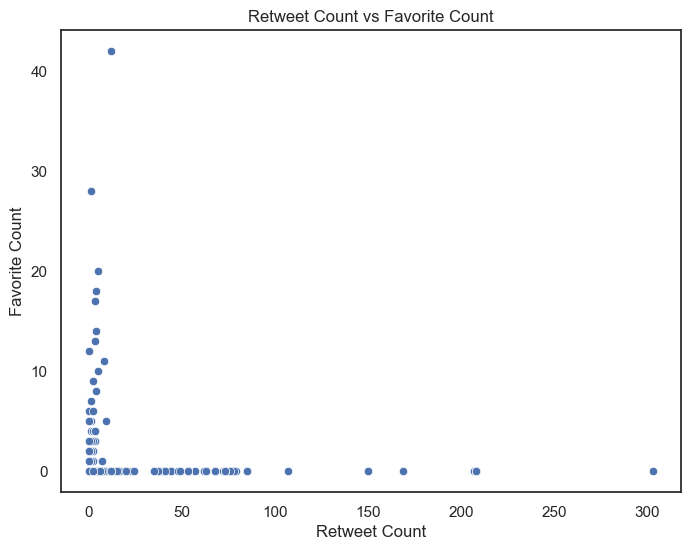

In [70]:
# Explore correlations.
# Examine if there’s a correlation between retweet counts and favorite counts to understand if more 
# retweeted tweets also tend to be more liked.
# Calculate the correlation between retweet and favorite counts.
correlation = tweets['tweet_retweet_count'].corr(tweets['tweet_favorite_count'])
print(f"Correlation between retweet and favorite counts: {correlation}")

# Scatter plot of retweet vs favorite counts
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tweet_retweet_count', y='tweet_favorite_count', data=tweets)
plt.title('Retweet Count vs Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()

### Observations

#### Engagement Patterns:
The weak correlation indicates that tweets with high retweet counts do not necessarily have high favorite counts and vice versa. This could suggest that the factors driving retweets and favorites might differ. For instance, a tweet might be retweeted for its informative content, while favorites might be given for content that is personally appealing.
#### Low General Engagement:
The concentration of data points near the origin suggests that most tweets in the dataset have low engagement. This could indicate a need for strategies to increase overall engagement, such as improving content quality or targeting specific audience segments.

In [71]:
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']].copy()

# View the DataFrame.
print("DataFrame containing only text values:")
print(tweets_text.head())

# Create a variable (tags), and assign an empty list to it
tags = []

DataFrame containing only text values:
                                                                                       tweet_full_text
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to...
1  RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #P...
2  RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet...
3  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect informa...
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Trans...


In [72]:
# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase
            tags.append(z.lower())
# Check if any hashtags are extracted
if not tags:
    print("No hashtags found in the tweets.")
else:
    print(f"Total hashtags found: {len(tags)}")

Total hashtags found: 4333


In [73]:
# Create a Pandas Series to count the values in the list
tags_series = pd.Series(tags)

# Display the first 30 records
print("First 30 hashtags found:")
print(tags_series.head(30))

First 30 hashtags found:
0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractiti

In [74]:
# Convert the series to a DataFrame in preparation for visualisation.
tags_df = tags_series.value_counts().reset_index()

# Rename the columns.
tags_df.columns = ['hashtag', 'count']

In [75]:
# Fix the count datatype.
tags_df['count'] = tags_df['count'].astype(int)

# View the result.
print("Top hashtags by count:")
print(tags_df.head())

Top hashtags by count:
       hashtag  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38


In [76]:
# Display records where the count is larger than 10.
popular_tags = tags_df[tags_df['count'] > 10]
print("Hashtags with a count greater than 10:")
print(popular_tags)

Hashtags with a count greater than 10:
                        hashtag  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemar

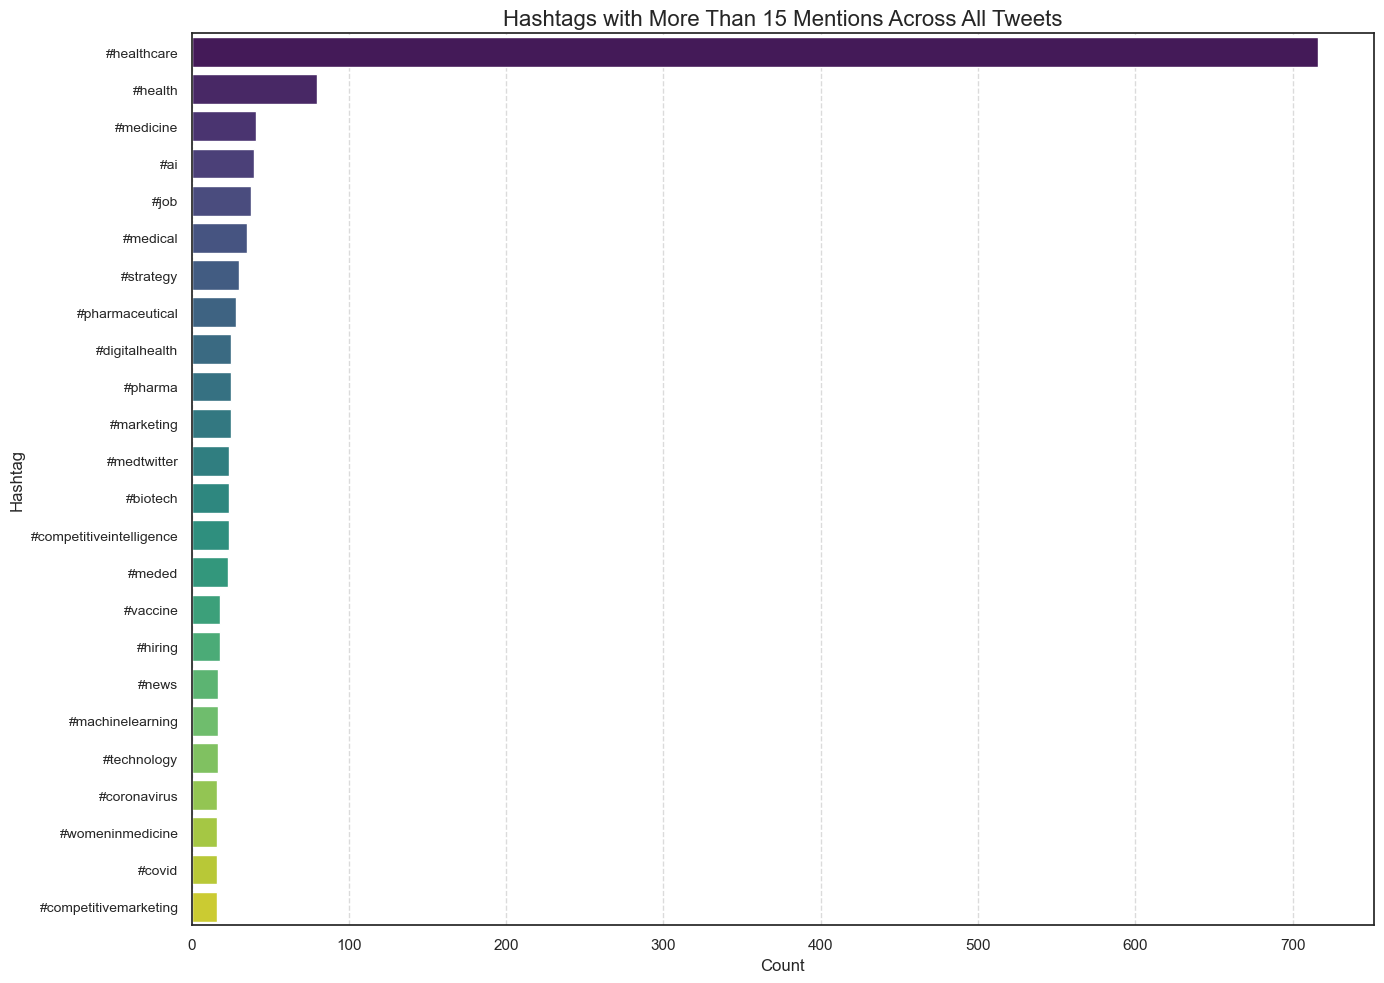

In [77]:
# Filter hashtags with a count greater than 15 to reduce clutter
filtered_tags = tags_df[tags_df['count'] > 15]

# Create a Seaborn barplot displaying records with a count larger than 15
plt.figure(figsize=(14, 10))  # Increase the figure size for better readability

# Create the plot using a horizontal bar plot
sns.barplot(x='count', y='hashtag', data=filtered_tags, palette='viridis', orient='h')

# Adjust the plot aesthetics
plt.title('Hashtags with More Than 15 Mentions Across All Tweets', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Hashtag', fontsize=12)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0, ha='right', fontsize=10)  # Align text right to avoid overlap

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot as an image file in the current directory
plt.savefig('hashtags_plot.png', format='png', dpi=300)

# View the barplot
plt.show()

### Observations:

#### Most Frequent Hashtags:
#healthcare and #health are the most frequently used hashtags, with #healthcare significantly surpassing the others in count. This indicates a strong focus on healthcare-related topics within the dataset.
#### Top Hashtags:
The top hashtags include #medicine, #ai, #job, and #medical, suggesting discussions around medicine, artificial intelligence, and employment in the healthcare sector.
#### Technology and Innovation:
Hashtags like #ai, #digitalhealth, #machinelearning, and #technology reflect an interest in technological advancements and their application in healthcare. This suggests that technology in healthcare is a trending topic.

### Utilizing Tweets to Provide Feedback 

#### Real-Time Feedback:
Identify Key Concerns: Analyse tweets related to NHS services to identify recurring issues and concerns. Use hashtags like #healthcare, #NHS, and #COVID to track public sentiment and identify areas needing improvement.
#### Monitor Service Feedback:
Patient Experience: Gather feedback on patient experiences through tweets to understand bottlenecks or inefficiencies within NHS services. Hashtags like #NHScare and #medtwitter can reveal direct patient feedback.
#### Track Resource Allocation Needs:
Analyse Public Demand: Monitor hashtags related to healthcare demands, such as #vaccine and #mentalhealth, to understand where resources may be stretched and require redistribution.

### Adding Value to the Overall Project

#### Efficient Resource Allocation:
Data-Driven Decisions: Analyze tweets to inform data-driven decisions on resource allocation, focusing on regions or services highlighted in public discussions.
#### Early Issue Detection:
Identify Trends and Anomalies: Use Twitter to detect emerging healthcare trends or anomalies, allowing for early intervention and adjustment of strategies.

### How the NHS Can Utilize Tweets

#### Public Health Campaigns:
Engage and Inform: Leverage Twitter to disseminate public health information and engage directly with citizens, enhancing transparency and trust.
#### Crisis Management:
Effective Communication: During healthcare crises, use Twitter for timely updates and accurate information dissemination to prevent misinformation and manage public expectations.
#### Service Improvement:
Feedback Loop: Create a feedback loop using Twitter to continually assess and improve NHS services based on public input and sentiment.

### Data Collection and Analysis

#### Hashtag Monitoring:
Expand Monitoring Capabilities: Track a broader set of healthcare-related hashtags to capture diverse public opinions and emerging issues.
#### Integrate with Healthcare Data:
Cross-Reference with NHS Data: Combine Twitter data with NHS performance data to correlate public sentiment with service metrics and outcomes.
#### Regular Stakeholder Reports:
Inform Policymakers: Provide regular reports to UK government stakeholders with insights from Twitter data to support policy decisions and strategic planning.

# 

## VI. Additional questions and observations 

### Main concerns posed by the NHS. 

In [78]:
# Prepare your workstation.
import pandas as pd

# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [79]:
# Print the min and max dates.
# Convert it to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Print the minimum and maximum dates using 'appointment_month'
min_date = ar['appointment_month'].min()
max_date = ar['appointment_month'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2020-01-01 00:00:00
Maximum date: 2022-06-01 00:00:00


In [80]:
# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

# View the filtered DataFrame
print("\nFiltered DataFrame (from 2021-08 onwards):")
print(filtered_ar.head())


Filtered DataFrame (from 2021-08 onwards):
     icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034        2021-08-01           Attended       GP   
3653    E54000034        2021-08-01           Attended       GP   
3654    E54000034        2021-08-01           Attended       GP   
3655    E54000034        2021-08-01           Attended       GP   
3656    E54000034        2021-08-01           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961  


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [81]:
# Create an aggregated data set to review the different features.
# Selecting the relevant columns for aggregation.
selected_columns = [
    'appointment_month', 
    'hcp_type', 
    'appointment_status', 
    'appointment_mode', 
    'time_between_book_and_appointment', 
    'count_of_appointments'
]

ar_subset = ar[selected_columns]

# Group by the specified columns and calculate the sum of 'count_of_appointments'.
ar_agg = ar_subset.groupby(
    ['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']
).sum().reset_index()

# View the DataFrame.
print("Aggregated DataFrame:")
print(ar_agg.head())

Aggregated DataFrame:
  appointment_month hcp_type appointment_status appointment_mode  \
0        2020-01-01       GP           Attended     Face-to-Face   
1        2020-01-01       GP           Attended     Face-to-Face   
2        2020-01-01       GP           Attended     Face-to-Face   
3        2020-01-01       GP           Attended     Face-to-Face   
4        2020-01-01       GP           Attended     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                 653846  
1                    15  to 21 Days                 620789  
2                       2 to 7 Days                1723834  
3                    22  to 28 Days                 421189  
4                     8  to 14 Days                1123186  


In [82]:
# Determine the total number of appointments per month.
# Group by 'appointment_month' and sum the 'count_of_appointments' to find total appointments per month
ar_df = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Calculate daily appointments by dividing the total monthly appointments by 30
# Add a new column 'utilisation' for the average utilization of services
max_daily_capacity = 1_200_000  # NHS planning guideline for maximum daily capacity
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30) / max_daily_capacity * 100

# Round the utilisation to one decimal place
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame.
print("DataFrame with Average Utilisation:")
print(ar_df)

DataFrame with Average Utilisation:
   appointment_month  count_of_appointments  utilisation
0         2020-01-01               27199296         75.6
1         2020-02-01               24104621         67.0
2         2020-03-01               24053468         66.8
3         2020-04-01               16007881         44.5
4         2020-05-01               16417212         45.6
5         2020-06-01               20690805         57.5
6         2020-07-01               22491437         62.5
7         2020-08-01               20150520         56.0
8         2020-09-01               26714255         74.2
9         2020-10-01               28301932         78.6
10        2020-11-01               25061602         69.6
11        2020-12-01               23535936         65.4
12        2021-01-01               22492069         62.5
13        2021-02-01               22399569         62.2
14        2021-03-01               27225424         75.6
15        2021-04-01               23879932         

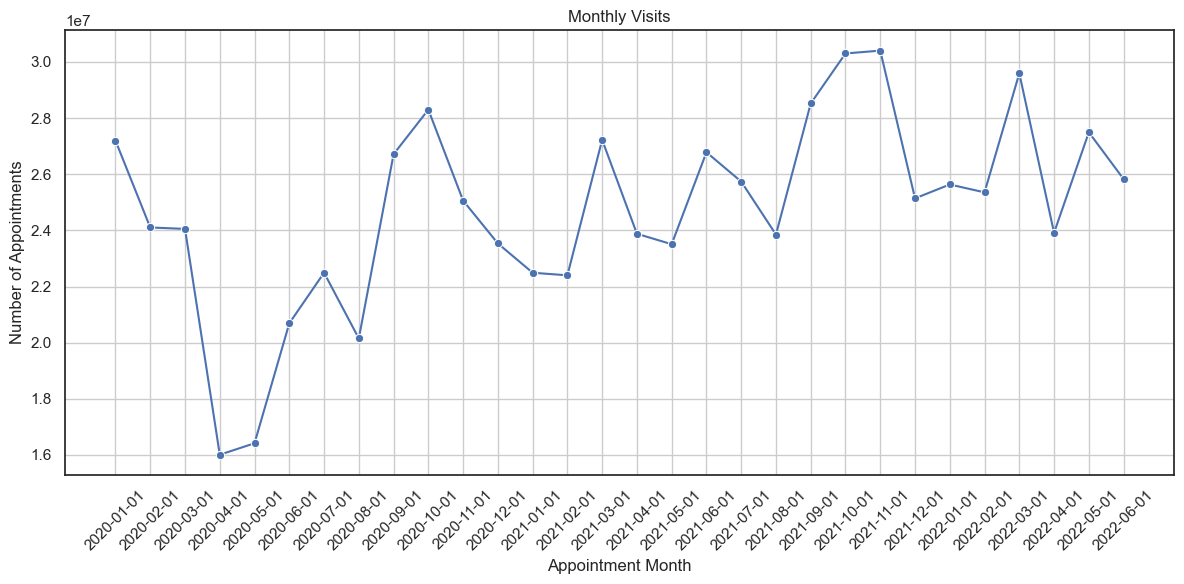

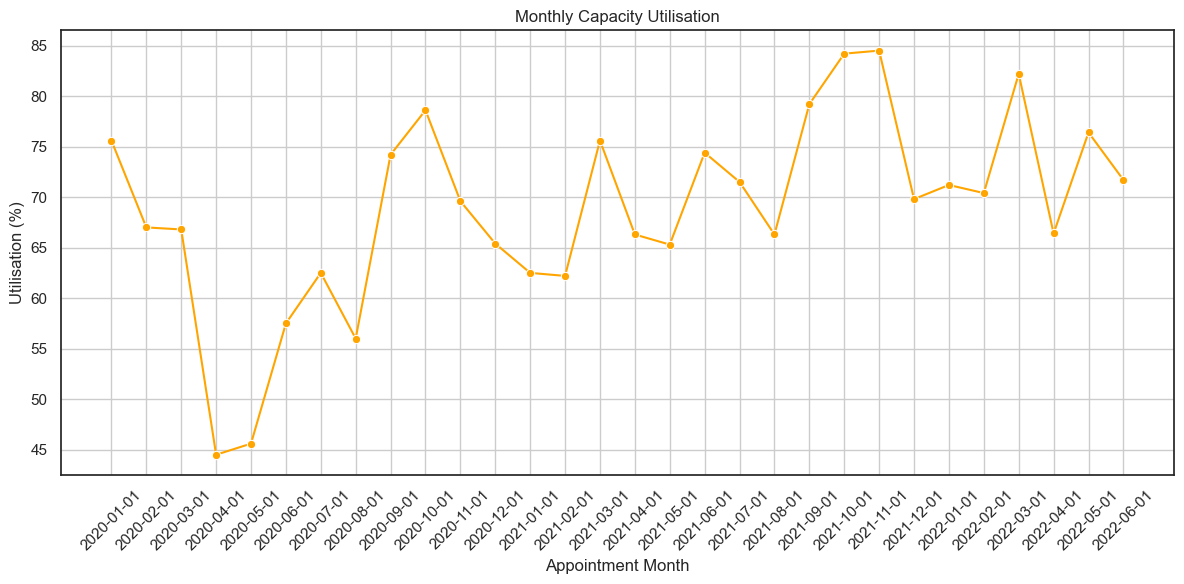

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sum of count of monthly visits.
# Create a DataFrame with the provided data
data = {
    'appointment_month': [
        '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
        '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
        '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
        '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
        '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
        '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01'
    ],
    'count_of_appointments': [
        27199296, 24104621, 24053468, 16007881, 16417212, 20690805, 22491437, 
        20150520, 26714255, 28301932, 25061602, 23535936, 22492069, 22399569, 
        27225424, 23879932, 23508395, 26784182, 25739219, 23852171, 28522501, 
        30303834, 30405070, 25140776, 25635474, 25355260, 29595038, 23913060, 
        27495508, 25828078
    ],
    'utilisation': [
        75.6, 67.0, 66.8, 44.5, 45.6, 57.5, 62.5, 56.0, 74.2, 78.6, 69.6, 65.4,
        62.5, 62.2, 75.6, 66.3, 65.3, 74.4, 71.5, 66.3, 79.2, 84.2, 84.5, 69.8,
        71.2, 70.4, 82.2, 66.4, 76.4, 71.7
    ]
}

# Create the DataFrame
ar_df = pd.DataFrame(data)

# Convert 'appointment_month' to string type for visualization ease
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
# Create a line plot for the number of monthly visits
plt.figure(figsize=(12, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='count_of_appointments', marker='o')
plt.title('Monthly Visits')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_visits.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Create a line plot for monthly capacity utilisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation', marker='o', color='orange')
plt.title('Monthly Capacity Utilisation')
plt.xlabel('Appointment Month')
plt.ylabel('Utilisation (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_capacity_utilisation.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations
#### There is a noticeable drop in the number of appointments around March to April 2020. This decline likely corresponds with the onset of the COVID-19 pandemic, where many non-essential medical appointments were likely postponed or canceled.
#### After the initial drop, there is a gradual recovery and an upward trend, indicating a return to more regular appointment scheduling as restrictions eased and healthcare services adapted.
#### A second dip is visible around December 2020 and January 2021, which could relate to another wave of the pandemic or seasonal factors impacting healthcare visits.
#### Following this, there is a general upward trend, suggesting increased appointment rates, potentially due to catching up on deferred care or an increase in healthcare service utilization.
#### April 2020 saw a significant drop to 44.5% utilization, which aligns with the early impact of the COVID-19 pandemic, where non-urgent appointments were reduced.
#### There was a gradual recovery in utilization rates over the following months.
#### The utilization rates in the latter half of 2021 and early 2022 show peaks, but they still do not reach full capacity, indicating that the system was able to handle the demand.
#### Given that the highest utilization was around 84.5%, it appears that the NHS had sufficient capacity during this period. Even during peaks, there was a buffer in capacity, suggesting that the system could accommodate increases in demand.

### Conclusion
#### Sufficient Capacity: The NHS system’s capacity was generally sufficient to handle the demand throughout the analyzed period. The system did not exceed its planning capacity of 1,200,000 appointments per day.
#### Planning Considerations: It is crucial for planning purposes to continue monitoring these trends, especially in anticipation of potential surges due to factors like pandemics, seasonal illnesses, or policy changes that might increase demand.

**Question 2:** How do the healthcare professional types differ over time?

In [84]:
# Create a lineplot to answer the question.
# Find the unique hcp_type values.
ar_df = pd.read_csv('appointments_regional.csv')

# Display the first few rows to verify the data
print(ar_df.head())

# Find all unique healthcare professional types
unique_hcp_types = ar_df['hcp_type'].unique()

# Display the unique hcp_type values
print("Unique Healthcare Professional Types:")
print(unique_hcp_types)

# Alternatively, you can use value_counts to see counts of each type
hcp_type_counts = ar_df['hcp_type'].value_counts()

# Display the counts for each hcp_type
print("\nCounts of Each Healthcare Professional Type:")
print(hcp_type_counts)

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  
Unique Healthcare Professional Types:
['GP' 'Other Practice staff' 'Unknown']

Counts of Each Healthcare Professional Type:
hcp_type
Other Practice

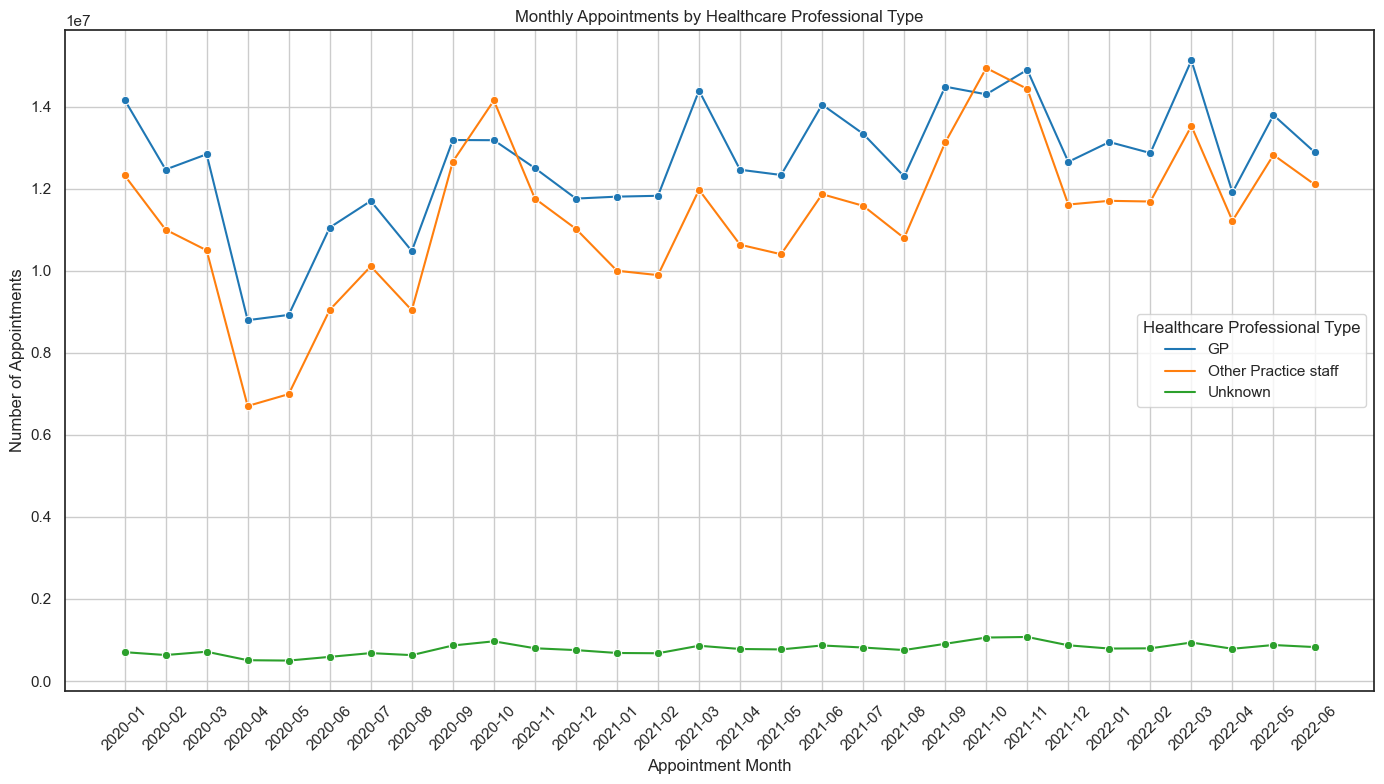

In [85]:
# Filter the dataset to include only specific hcp_type values
relevant_hcp_types = ['Other Practice staff', 'GP', 'Unknown']
filtered_df = ar_df[ar_df['hcp_type'].isin(relevant_hcp_types)]

# Group by 'appointment_month' and 'hcp_type', then sum 'count_of_appointments'
hcp_agg_df = filtered_df.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=hcp_agg_df, 
    x='appointment_month', 
    y='count_of_appointments', 
    hue='hcp_type', 
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Healthcare Professional Type')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Healthcare Professional Type')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_appointments_by_hcp_type.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations

#### General Practitioners (GPs):
Dominant Role: GPs have the highest number of appointments consistently throughout the time period. This is expected as GPs are often the first point of contact in healthcare.
Trend Fluctuations: There is a noticeable decline in GP appointments starting in March 2020, reaching a low in April 2020, which aligns with the onset of the COVID-19 pandemic. The numbers then gradually recover, showing resilience and adaptability in healthcare delivery.
Seasonal Variations: There are periodic increases and decreases that might reflect seasonal health trends, such as winter illnesses potentially causing spikes in appointments.
#### Other Practice Staff:
Significant Contributor: This group also plays a substantial role, with appointment numbers close to those of GPs but consistently lower.
Pandemic Impact: Similar to GPs, there is a decline in appointments during the early months of the pandemic (March and April 2020), with a slow recovery afterwards.
Parallel Trends: The trends for Other Practice Staff often mirror those of GPs, indicating a coordinated approach in patient care delivery across different healthcare professionals.
#### Unknown:
Consistently Low Numbers: The appointments labeled as “Unknown” are significantly lower than the other two categories. This may represent either genuinely unclassified appointments or data quality issues where the type was not recorded.

**Question 3:** Are there significant changes in whether or not visits are attended?

In [86]:
# Create a lineplot to answer the question.
# Find the unique appointment_mode values.
ar_df = pd.read_csv('appointments_regional.csv')

# Display the first few rows to verify the data
print(ar_df.head())

# Find all unique values in the 'appointment_mode' column
unique_appointment_modes = ar_df['appointment_mode'].unique()

# Display the unique values
print("Unique Appointment Modes:")
print(unique_appointment_modes)

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  
Unique Appointment Modes:
['Face-to-Face' 'Home Visit' 'Telephone' 'Unknown' 'Video/Online']


In [87]:
# Find the unique appointment_status values.
unique_appointment_statuses = ar_df['appointment_status'].unique()

# Display the unique values
print("Unique Appointment Statuses:")
print(unique_appointment_statuses)

Unique Appointment Statuses:
['Attended' 'DNA' 'Unknown']


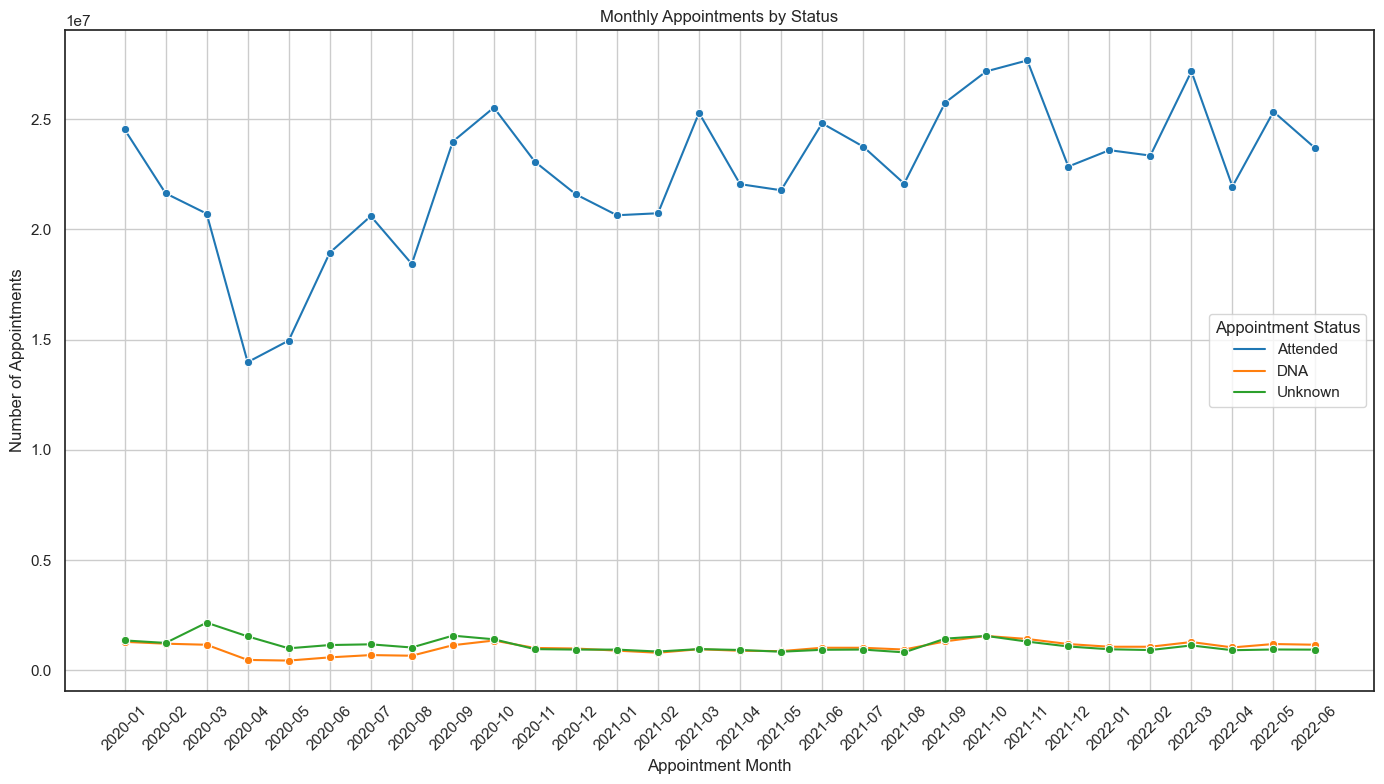

In [88]:
# Group by 'appointment_month' and 'appointment_status' and sum 'count_of_appointments'
status_agg_df = ar_df.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=status_agg_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='appointment_status',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Status')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_appointments_by_status.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations
#### Attended Appointments:
Dominance: The “Attended” status has the highest number of appointments consistently over time. This suggests that the majority of appointments are attended, indicating a strong adherence to scheduled visits.
COVID-19 Impact: There is a noticeable drop in attended appointments around March to April 2020, coinciding with the onset of the COVID-19 pandemic. This decline is likely due to lockdowns and restrictions, as well as patient hesitancy or cancellations.
Recovery and Trends: After the initial decline, attended appointments show a gradual recovery and stabilization, with minor fluctuations. There are peaks and troughs, possibly reflecting seasonal patterns or external influences like the availability of healthcare services and changes in restrictions.
#### DNA (Did Not Attend):
Low dominance: The “DNA” line remains relatively low compared to “Attended,” but it is consistently visible, indicating a persistent issue of non-attendance.
Consistency: Despite the low numbers, the DNA rates appear relatively stable, with minor variations over time.
#### Unknown Status:
Almost no contribution: The “Unknown” status is minimal and remains consistently low throughout the period. This suggests that most appointments are categorized correctly, though there might be some data quality issues leading to this classification.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

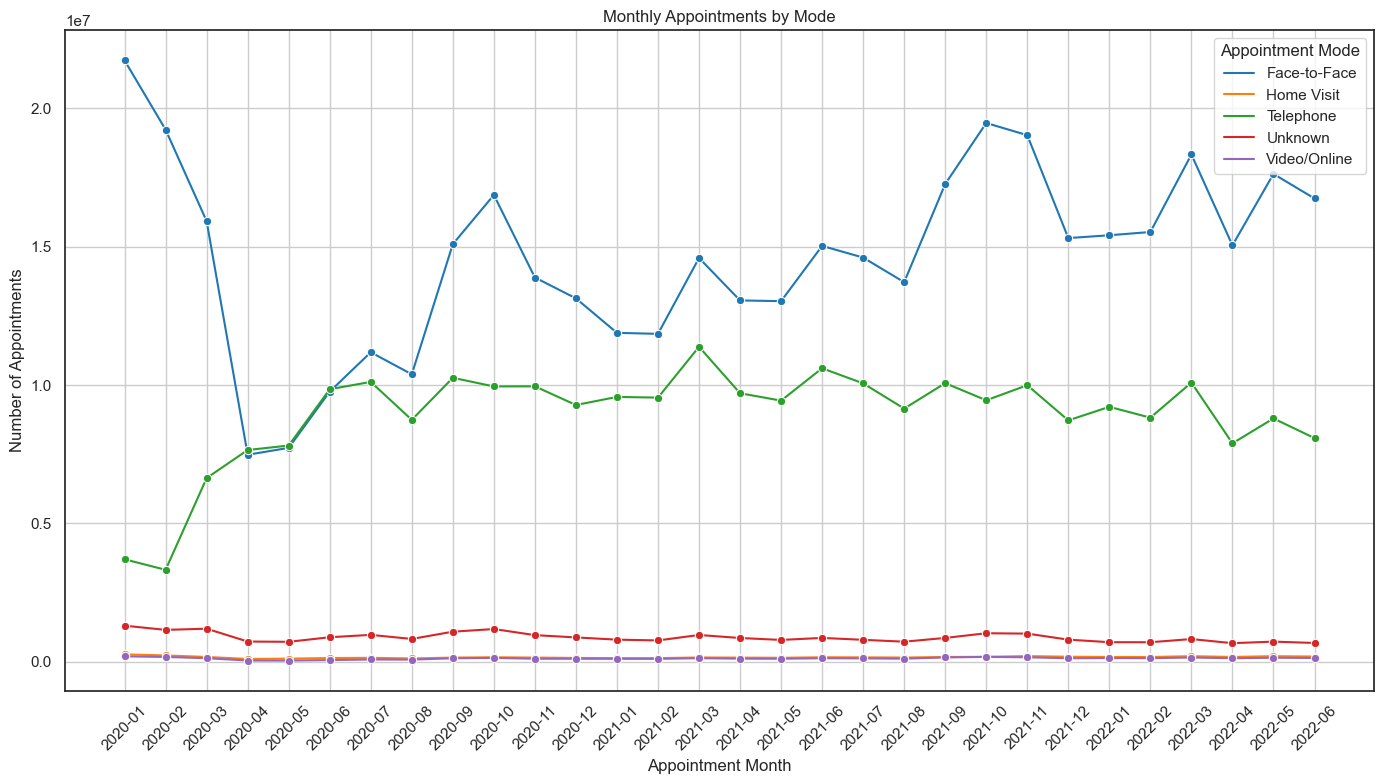

In [89]:
# Create a lineplot to answer the question.
# Group by 'appointment_month' and 'appointment_mode' and sum 'count_of_appointments'
mode_agg_df = ar_df.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=mode_agg_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='appointment_mode',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Mode')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_appointments_by_mode.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations

#### Face-to-Face Appointments:
Dominance and Decline: Face-to-face appointments are the most common mode of appointment, consistently higher than other modes throughout the observed period. However, there is a significant decline in face-to-face appointments starting around March 2020, coinciding with the onset of the COVID-19 pandemic.
Recovery and Variability: After the initial drop, there is a gradual recovery in face-to-face appointments, with noticeable fluctuations over time. The recovery suggests adaptation in healthcare delivery as restrictions eased.
#### Telephone Appointments:
Increase During Pandemic: Telephone appointments show a significant increase during the early months of the pandemic (around March to May 2020). This indicates a shift towards remote consultations as healthcare providers adapted to social distancing and lockdown measures.
Sustained Utilization: The usage of telephone appointments remains relatively stable post-pandemic, suggesting that this mode has become an integral part of healthcare delivery.
#### Video/Online Appointments:
Low but Present: Video/Online appointments have low usage compared to other modes but show a slight increase during the pandemic. This mode may have potential for growth as technology adoption continues in healthcare.
Steady Trend: Despite its lower volume, the presence of video/online appointments indicates efforts to diversify consultation modes.
#### Home Visit Appointments:
Minimal Usage: Home visits remain consistently low, likely reserved for specific patient needs or circumstances requiring in-person care at home.
Stability: The volume of home visits is stable, indicating a niche but essential role within the healthcare delivery system.
#### Unknown Mode:
Negligible Presence: The “Unknown” category is almost negligible, suggesting good data quality and classification accuracy for appointment modes.

### Recommendations
#### Resource Allocation:
Adjust resource allocation to support the continued integration of remote appointment modes, ensuring infrastructure and staff are optimized for telehealth services.
#### Explore Video/Online Potential:
Investigate barriers to adoption of video/online appointments and consider strategies to enhance uptake, potentially expanding access and convenience for patients.

**Question 5:** Are there any trends in time between booking an appointment?

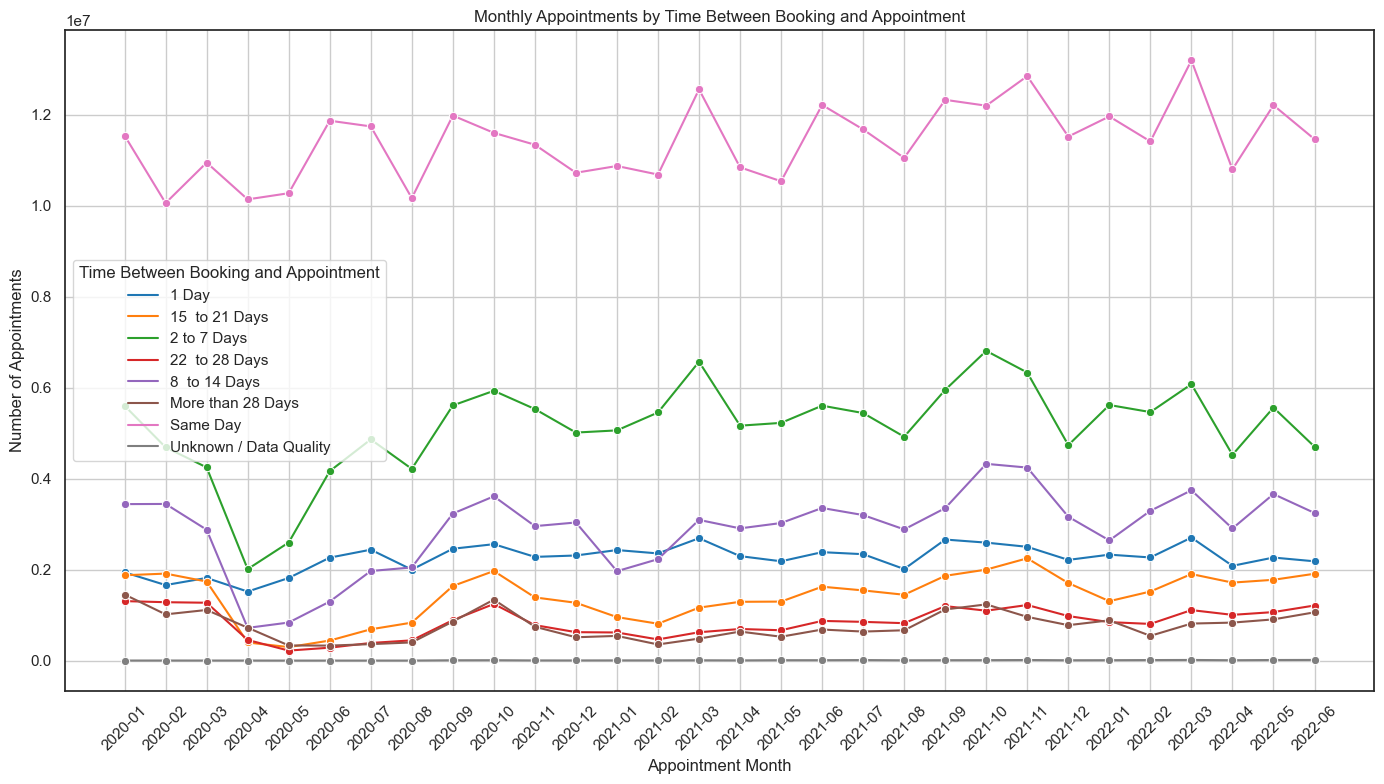

In [90]:
# Create a lineplot to answer the question.
# Group by 'appointment_month' and 'time_between_book_and_appointment' and sum 'count_of_appointments'
time_agg_df = ar_df.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=time_agg_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='time_between_book_and_appointment',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Time Between Booking and Appointment')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Time Between Booking and Appointment')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

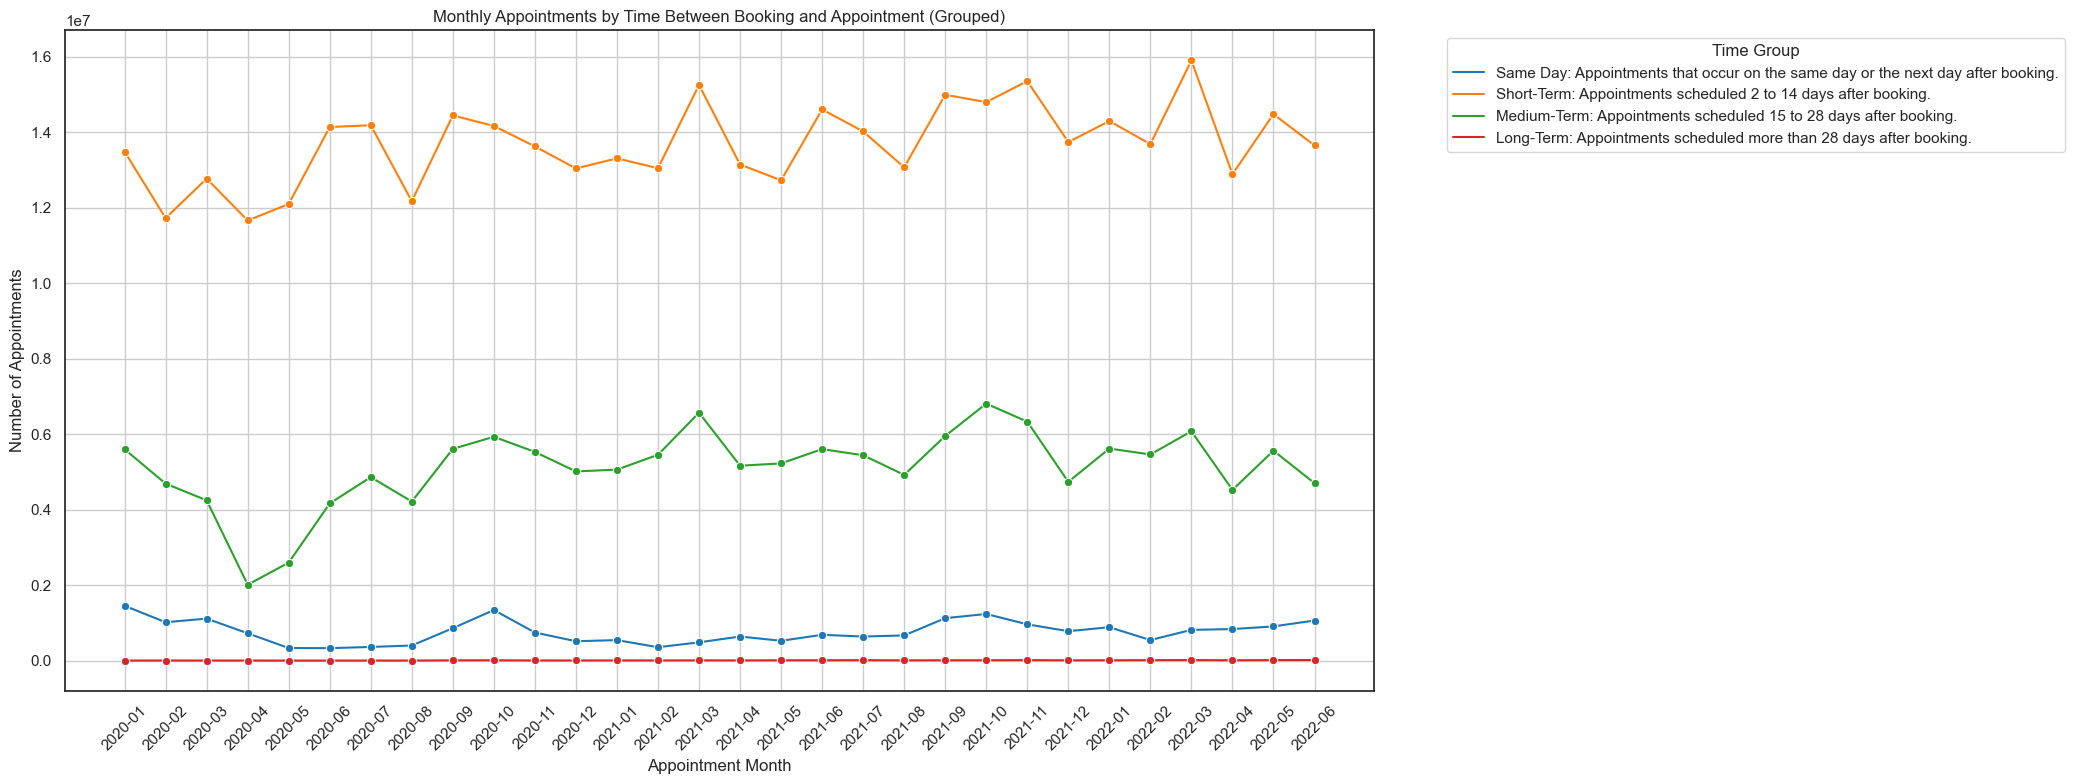

In [91]:
# Since the lineplot is too cluttery, we can group it.
# Define a mapping for grouping the time intervals
time_group_mapping = {
    '1 Day': 'Same Day',
    'Same Day': 'Same Day',
    '2 to 7 Days': 'Short-Term',
    '8 to 14 Days': 'Short-Term',
    '15 to 21 Days': 'Medium-Term',
    '22 to 28 Days': 'Medium-Term',
    'More than 28 Days': 'Long-Term',
    'Unknown / Data Quality': 'Unknown'
}

# Apply the mapping to create a new column for grouped intervals
ar_df['time_group'] = ar_df['time_between_book_and_appointment'].map(time_group_mapping)

# Group by 'appointment_month' and 'time_group' and sum 'count_of_appointments'
grouped_time_agg_df = ar_df.groupby(['appointment_month', 'time_group'])['count_of_appointments'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_time_agg_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='time_group',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Time Between Booking and Appointment (Grouped)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Add a custom legend
legend_labels = [
    "Same Day: Appointments that occur on the same day or the next day after booking.",
    "Short-Term: Appointments scheduled 2 to 14 days after booking.",
    "Medium-Term: Appointments scheduled 15 to 28 days after booking.",
    "Long-Term: Appointments scheduled more than 28 days after booking.",
    "Unknown: Appointments with unclear or unrecorded booking intervals."
]

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=legend_labels, title='Time Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot to a file
plt.savefig('monthly_appointments_by_time_booking_and_appointment.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations
#### Short-Term Appointments:
Dominance: Short-term appointments (scheduled 2 to 14 days after booking) appear to be the most common category in the plot. This suggests a preference for relatively quick access to healthcare services, possibly for semi-urgent needs or follow-up visits.
Volume and Stability: The volume is consistently higher than other categories, showing some fluctuations, possibly reflecting variations in demand due to seasonal factors or healthcare system changes.
#### Medium-Term Appointments:
Significant Contributor: Medium-term appointments (scheduled 15 to 28 days after booking) are the second most frequent category. This reflects routine planning and scheduling of healthcare services within a few weeks or not enough capacity for shorter term appointments.
Trend Fluctuations: There are visible fluctuations, indicating variability in medium-term scheduling, possibly influenced by availability and patient preferences.
#### Long-Term Appointments:
Moderate Usage: Long-term appointments (scheduled more than 28 days after booking) have a lower volume compared to short-term and medium-term categories, suggesting less frequent advance planning.
Consistency: The trend for long-term appointments is relatively stable, showing minor variations over time.
#### Same Day Appointments:
Low Frequency: Same day appointments (occurring on the same day or the next day) have the lowest volume, possibly indicating limited capacity for immediate scheduling.
#### Unknown Appointments:
Negligible Presence: The “Unknown” category is minimal, highlighting good data quality and effective classification of booking intervals.

### Recommendations
#### Focus on Short-Term Capacity:
Given the dominance of short-term appointments, healthcare providers should ensure adequate resources and capacity to meet this demand effectively.
#### Optimize Medium-Term Scheduling:
Align medium-term appointment availability with routine care needs and patient preferences, adjusting scheduling policies as necessary.
#### Explore Same Day Availability:
Consider strategies to enhance capacity for same day appointments, potentially improving access for urgent care needs.

**Question 6:** How does the spread of service settings compare?

In [92]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
# Load the dataset
national_df = pd.read_excel('national_categories.xlsx')

# Display the first few rows of the DataFrame to understand its structure
print(national_df.head())

  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2             

In [93]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
# Ensure 'appointment_month' is in datetime format
national_df['appointment_month'] = pd.to_datetime(national_df['appointment_month'], format='%Y-%m')

# Group data by 'appointment_month' and 'service_setting' to sum 'count_of_appointments'
grouped_national_df = national_df.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the new DataFrame
print(grouped_national_df.head())

  appointment_month            service_setting  count_of_appointments
0        2021-08-01  Extended Access Provision                 160927
1        2021-08-01           General Practice               21575852
2        2021-08-01                      Other                 449101
3        2021-08-01       Primary Care Network                 432448
4        2021-08-01                   Unmapped                1233843


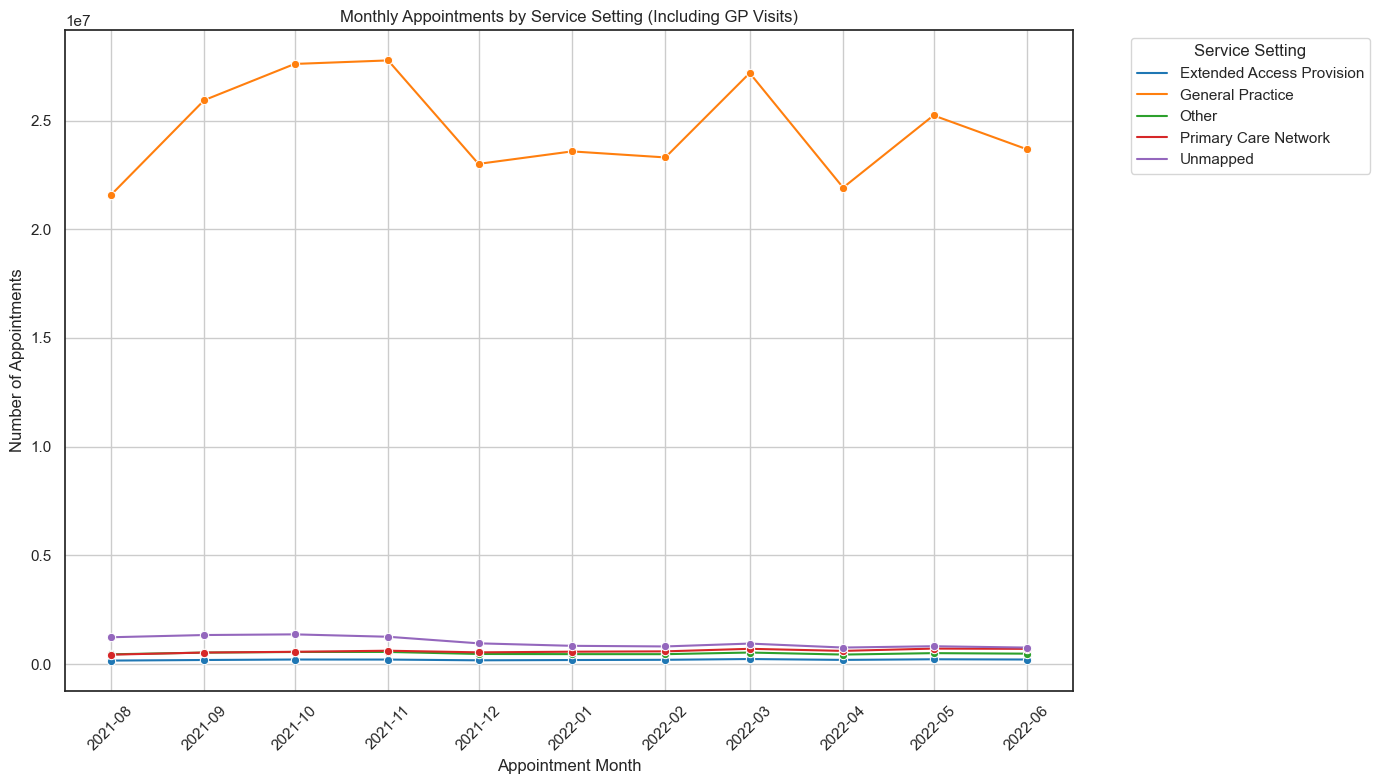

In [94]:
# Create a boxplot to investigate the spread of service settings.
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_national_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Service Setting (Including GP Visits)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_appointments_including_gp.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

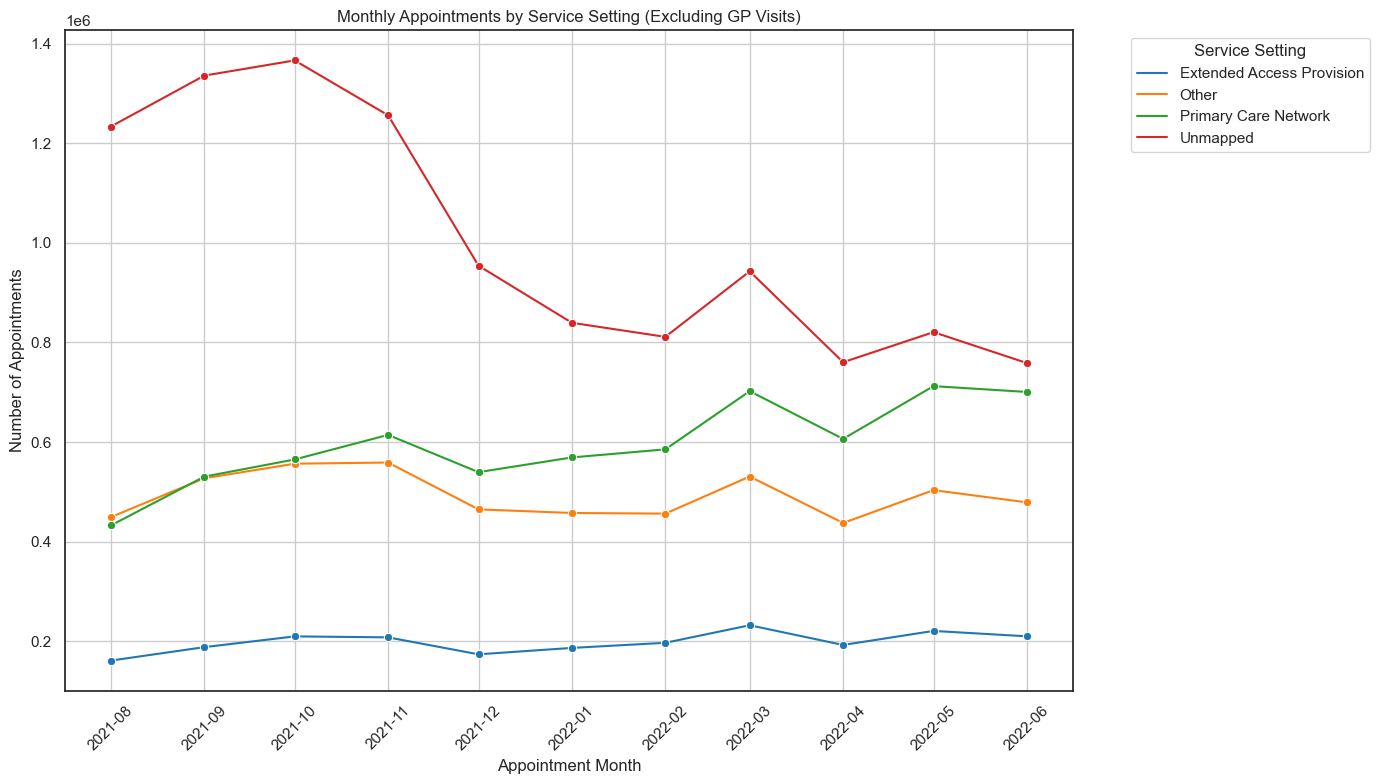

In [95]:
# Create a boxplot to investigate the service settings without GP.
# Filter out GP visits from the DataFrame
non_gp_df = grouped_national_df[grouped_national_df['service_setting'] != 'General Practice']

# Create the second visualization excluding GP visits
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=non_gp_df,
    x='appointment_month',
    y='count_of_appointments',
    hue='service_setting',
    marker='o',
    palette='tab10'
)

# Customize the plot
plt.title('Monthly Appointments by Service Setting (Excluding GP Visits)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('monthly_appointments_excluding_gp.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Observations
#### Dominance of General Practice:
The General Practice line is significantly higher than other service settings, indicating that GP visits make up the bulk of appointments. This is expected, as GPs often serve as the first point of contact in the healthcare system for many patients.
#### Stable Trend in GP Appointments:
The volume of GP appointments appears relatively stable with some fluctuations. There is a noticeable increase in late 2021, followed by slight dips and rises. This stability suggests consistent demand for GP services throughout the period.
#### Other Service Settings:
The other service settings have significantly lower volumes of appointments compared to General Practice.
Primary Care Network shows a higher volume than other non-GP settings, reflecting its role in providing comprehensive care across networks of providers. This setting’s appointments decrease slightly from a peak in late 2021 and early 2022.

### Recommendations
#### Focus on GP Capacity:
Given the dominance of GP appointments, ensure resources and capacity are optimized to meet this persistent demand. Strategies might include improving GP access, enhancing digital consultations, or integrating more preventive care initiatives.
#### Support for Non-GP Services:
Encourage utilization of non-GP services where appropriate to reduce the burden on GP practices. This could involve expanding awareness and availability of services like Extended Access and Primary Care Networks.